In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import gsw

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Coast)
case_wide = 'Wide Coast'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)



# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)



#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_both['xh']==211)[0][0]
x_east = np.where(dy_both['xh']==351)[0][0]
y = np.where(dy_both['yq']==-35)[0][0]
y_south = np.where(dy_both['yq']==-71)[0][0]
y_north = np.where(dy_both['yq']==71)[0][0]



/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [2]:
def calculate_basin_sfn(vmo, vhGM, x_west, x_east, y_south, y_north):
#     vmo_slice = vmo.isel(time=slice(-31,-1)).mean(dim='time')
#     vhGM_slice = vhGM.isel(time=slice(-31,-1)).mean(dim='time')
    vmo_slice = vmo.mean(dim='time')
    vhGM_slice = vhGM.mean(dim='time')
    sfn_basin_resmean = (vmo_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_res = (vhGM_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
    return sfn_basin_resmean


def find_max_overturning(sfn_basin_resmean, dataset):
#     max_value = sfn_basin_resmean[:,0:49].max()
#     max_index = np.where(sfn_basin_resmean[:,0:49] == max_value)
    
    max_value = sfn_basin_resmean.sel(yq=slice(-30,60)).max()
    max_index = np.where(sfn_basin_resmean.sel(yq=slice(-30,60)) == max_value)
    
    max_depth = dataset.z_l.isel(z_l=max_index[0][0])
    max_lat = dataset.yq.isel(yq=max_index[1][0])

    return(max_value, max_depth, max_lat)


def calc_sigma_wright(salt, temp, press=2000):
    '''Wright EOS density calculation. Default reference pressure is 2000db, but can be set to any pressure.'''

    p = press*10000
    
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    alpha_0 = a0 + a1*temp + a2*salt
    p_0 = b0 + b1*temp + b2*temp**2 + b3*temp**3 + b4*salt + b5*salt*temp
    lam = c0 + c1*temp + c2*temp**2 + c3*temp**3 + c4*salt + c5*salt*temp

    sigma2 = (p+p_0)/(lam + alpha_0*(p+p_0))
    
    if hasattr(temp, 'attrs'):
        sigma2_xarray = temp.copy()
    else:
        sigma2_xarray = salt.copy()
    sigma2_xarray.attrs['units'] = 'kg/m^3' 
    sigma2_xarray.attrs['long_name'] = 'potential density referenced to 2000 dbar'
    sigma2_xarray.attrs['standard_name'] = 'sigma2'
    sigma2_xarray.values = sigma2
    
    return sigma2_xarray
#     return sigma2


In [3]:
# test = calc_sigma_wright(35, 10)
# print(test)

### First, calculate AMOC, find max overturning strength, and find max overturning depth

In [4]:
sfn_small_resmean_straight = calculate_basin_sfn(dz_straight.vmo, dz_straight.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_straight, max_depth_straight, max_lat_straight = find_max_overturning(sfn_small_resmean_straight, dz_straight)

print(case_straight)
print(max_ov_straight.values, 'Sv')
print(max_depth_straight.values, 'm')

Straight Coast
28.273693 Sv
1100.0 m


In [5]:
sfn_small_resmean_both = calculate_basin_sfn(dz_both.vmo, dz_both.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_both, max_depth_both, max_lat_both = find_max_overturning(sfn_small_resmean_both, dz_both)

print(case_both)
print(max_ov_both.values, 'Sv')
print(max_depth_both.values, 'm')

Both Coast
34.64018 Sv
1300.0 m


In [6]:
sfn_small_resmean_wide = calculate_basin_sfn(dz_wide.vmo, dz_wide.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_wide, max_depth_wide, max_lat_wide = find_max_overturning(sfn_small_resmean_wide, dz_wide)

print(case_wide)
print(max_ov_wide.values, 'Sv')
print(max_depth_wide.values, 'm')

Wide Coast
38.518505 Sv
1100.0 m


In [7]:
sfn_small_resmean_am = calculate_basin_sfn(dz_am.vmo, dz_am.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_am, max_depth_am, max_lat_am = find_max_overturning(sfn_small_resmean_am, dz_am)

print(case_am)
print(max_ov_am.values, 'Sv')
print(max_depth_am.values, 'm')

America Coast
34.42898 Sv
1200.0 m


In [8]:
sfn_small_resmean_af = calculate_basin_sfn(dz_af.vmo, dz_af.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_af, max_depth_af, max_lat_af = find_max_overturning(sfn_small_resmean_af, dz_af)

print(case_af)
print(max_ov_af.values, 'Sv')
print(max_depth_af.values, 'm')

Africa Coast
28.83817 Sv
1100.0 m


### Now calculate  $\Delta \rho$ for each case

In [9]:
# rho_north_straight = calc_sigma_wright(
#     dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_straight = calc_sigma_wright(
#     dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_straight = calc_sigma_wright(
    dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_straight = calc_sigma_wright(
    dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_straight_tmp = rho_north_straight.copy()
delta_rho_straight_tmp.values = rho_north_straight.values-rho_south_straight.values
delta_rho_straight = delta_rho_straight_tmp.mean(dim='yh').mean(dim='xh')


In [10]:
# rho_north_both = calc_sigma_wright(
#     dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_both = calc_sigma_wright(
#     dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_both = calc_sigma_wright(
    dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_both = calc_sigma_wright(
    dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_both_tmp = rho_north_both.copy()
delta_rho_both_tmp.values = rho_north_both.values-rho_south_both.values
delta_rho_both = delta_rho_both_tmp.mean(dim='yh').mean(dim='xh')

In [11]:
# rho_north_wide = calc_sigma_wright(
#     dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_wide = calc_sigma_wright(
#     dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_wide = calc_sigma_wright(
    dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_wide = calc_sigma_wright(
    dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_wide_tmp = rho_north_wide.copy()
delta_rho_wide_tmp.values = rho_north_wide.values-rho_south_wide.values
delta_rho_wide = delta_rho_wide_tmp.mean(dim='yh').mean(dim='xh')

In [12]:
# rho_north_am = calc_sigma_wright(
#     dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_am = calc_sigma_wright(
#     dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_am = calc_sigma_wright(
    dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_am = calc_sigma_wright(
    dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_am_tmp = rho_north_am.copy()
delta_rho_am_tmp.values = rho_north_am.values-rho_south_am.values
delta_rho_am = delta_rho_am_tmp.mean(dim='yh').mean(dim='xh')

In [13]:
# rho_north_af = calc_sigma_wright(
#     dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

# rho_south_af = calc_sigma_wright(
#     dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
#     dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'),
#     2000)

rho_north_af = calc_sigma_wright(
    dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    2000)

rho_south_af = calc_sigma_wright(
    dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'), 
    dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'),
    2000)

delta_rho_af_tmp = rho_north_af.copy()
delta_rho_af_tmp.values = rho_north_af.values-rho_south_af.values
delta_rho_af = delta_rho_af_tmp.mean(dim='yh').mean(dim='xh')

### Predicted AMOC strength from Butler et al 2016

In [14]:
## flip the delta rho arrays to integrate from depth to surface instead of the other way around

delta_rho_straight = delta_rho_straight[::-1]
delta_rho_both = delta_rho_both[::-1]
delta_rho_wide = delta_rho_wide[::-1]
delta_rho_am = delta_rho_am[::-1]
delta_rho_af = delta_rho_af[::-1]

In [54]:
# Set constants for the calculation here

##### average narrow basin width
# Lx_straight = 7e6  # m
# Lx_wide = 9.3e6    # m
# Lx_both = 9.4e6    # m
# Lx_am = 8.5e6      # m
# Lx_af = 8e6        # m

##### average basin width between 30S and 60N
# Lx_straight = 7.7e6  # m
# Lx_wide = 1.0e7    # m
# Lx_both = 1.0e7    # m
# Lx_am = 9e6      # m
# Lx_af = 8.7e6        # m

##### average basin width between 0 and 60N
# Lx_straight = 7.5e6  # m
# Lx_wide = 9.5e6    # m
# Lx_both = 9.5e6    # m
# Lx_am = 9.3e6      # m
# Lx_af = 7.6e6        # m

##### average basin width between 20N and 60N
Lx_straight = 7.5e6  # m
Lx_wide = 9.2e6    # m
Lx_both = 9e6    # m
Lx_am = 9e6      # m
Lx_af = 7e6        # m





############################################################
##### These don't get used until later for plotting stuff
Lx_n_straight = 4.5e6  # m
Lx_n_wide = 5.8e6    # m
Lx_n_both = 4.5e6   # m
Lx_n_am = 4.5e6      # m
Lx_n_af = 4.5e6        # m

Lx_s_straight = 7.7e6  # m
Lx_s_wide = 10e6  # m
Lx_s_both = 11e6    # m
Lx_s_am = 8.7e6      # m
Lx_s_af = 10e6        # m
#####

dz = xr.zeros_like(dy_straight.zl) + 2.5
dz[1:31] = dy_straight.zl.diff('zl').values

c_rho = 0.94
g = 9.81
rho_0 = 1035
f_0 = 1e-4
# Ly = (60)*111000 # uncomment if doing density diff from north to eq
Ly = (60+31)*111000 # uncomment if doing density diff from north to southern extent of Africa

constant = c_rho*g/(rho_0*f_0*Ly)

h = delta_rho_straight.zl.isel(zl=0)

# latitude bounds for model output maximum overturning for comparison with predicted overturning

# lat_s = -30
lat_s = 0
lat_n = 60

In [55]:
# Straight Coast calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_straight = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_straight = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_straight[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_straight = constant * (term1_straight - term2_straight)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_straight_tmp = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (Vz_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_straight_tmp[i] = integ.values

Psi_straight = (Psi_straight_tmp*Lx_straight)/(1e6)

print(Psi_straight.max())

max_index = np.where(Psi_straight == Psi_straight.max())
    
Psi_max_depth_straight = Psi_straight.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_straight)


<xarray.DataArray 'thetao' ()>
array(26.87676535)
<xarray.DataArray 'zl' ()>
array(1000.)
Coordinates:
    zl       float64 1e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


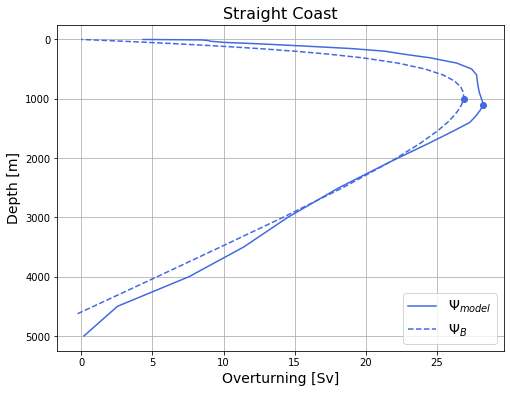

<xarray.DataArray 'vmo' ()>
array(28.273693, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1100.)
Coordinates:
    z_l      float64 1.1e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [56]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_straight = []

sfn_straight = sfn_small_resmean_straight.sel(yq=slice(lat_s,lat_n))

psi_max_straight = np.amax(sfn_straight, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_straight, sfn_small_resmean_straight.z_l, color='royalblue', label='$\Psi_{model}$')
ax.plot(Psi_straight, Psi_straight.zl, color='royalblue', linestyle='dashed', label='$\Psi_{B}$')
ax.plot(Psi_straight.max(), Psi_max_depth_straight, color='royalblue', marker='o', markersize=6)
ax.plot(psi_max_straight.max(), max_depth_straight, color='royalblue', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_straight, fontsize=16)
plt.show()

print(psi_max_straight.max(), 'Sv')
print(max_depth_straight)

In [57]:
# Both Coast calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

# c_rho = 0.87
# constant = c_rho*g/(rho_0*f_0*Ly)

term1_tmp = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (delta_rho_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_both = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_both = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (delta_rho_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_both[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_both = constant * (term1_both - term2_both)


# Psi_p = Lx * integral from z to 0 of Vz 
Psi_both_tmp = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (Vz_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_both_tmp[i] = integ.values

Psi_both = (Psi_both_tmp*Lx_both)/(1e6)

print(Psi_both.max())

max_index = np.where(Psi_both == Psi_both.max())
    
Psi_max_depth_both = Psi_both.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_both)


<xarray.DataArray 'thetao' ()>
array(37.80204716)
<xarray.DataArray 'zl' ()>
array(1000.)
Coordinates:
    zl       float64 1e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


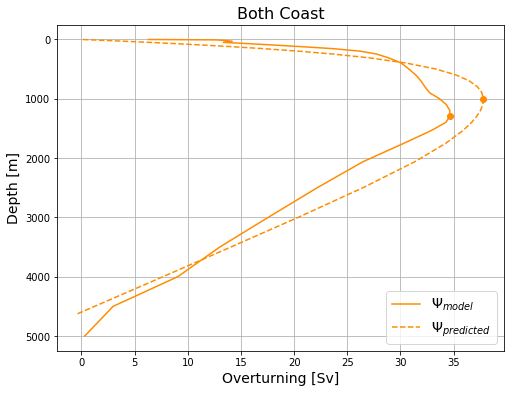

<xarray.DataArray 'vmo' ()>
array(34.64018, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1300.)
Coordinates:
    z_l      float64 1.3e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [58]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_both = []

sfn_both = sfn_small_resmean_both.sel(yq=slice(lat_s,lat_n))

psi_max_both = np.amax(sfn_both, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_both, sfn_small_resmean_both.z_l, color='darkorange', label='$\Psi_{model}$')
ax.plot(Psi_both, Psi_both.zl, color='darkorange', linestyle='dashed', label='$\Psi_{predicted}$')
ax.plot(Psi_both.max(), Psi_max_depth_both, color='darkorange', marker='o', markersize=6)
ax.plot(psi_max_both.max(), max_depth_both, color='darkorange', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_both, fontsize=16)
plt.show()

print(psi_max_both.max(), 'Sv')
print(max_depth_both)

In [59]:
# Wide Straight calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (delta_rho_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_wide = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_wide = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (delta_rho_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_wide[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_wide = constant * (term1_wide - term2_wide)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_wide_tmp = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (Vz_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_wide_tmp[i] = integ.values

Psi_wide = (Psi_wide_tmp*Lx_wide)/(1e6)

print(Psi_wide.max())

max_index = np.where(Psi_wide == Psi_wide.max())
    
Psi_max_depth_wide = Psi_wide.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_wide)


<xarray.DataArray 'thetao' ()>
array(40.26526699)
<xarray.DataArray 'zl' ()>
array(1200.)
Coordinates:
    zl       float64 1.2e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


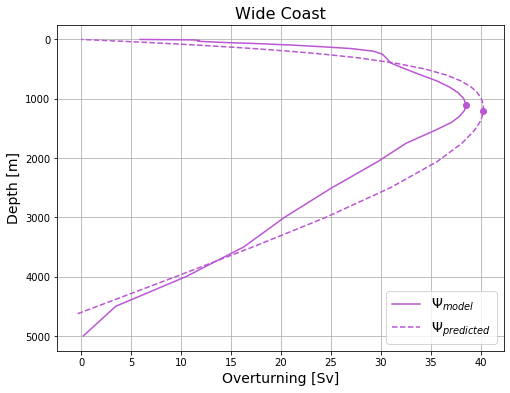

<xarray.DataArray 'vmo' ()>
array(38.518505, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1100.)
Coordinates:
    z_l      float64 1.1e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [60]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_wide = []

sfn_wide = sfn_small_resmean_wide.sel(yq=slice(lat_s,lat_n))

psi_max_wide = np.amax(sfn_wide, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_wide, sfn_small_resmean_wide.z_l, color='mediumorchid', label='$\Psi_{model}$')
ax.plot(Psi_wide, Psi_wide.zl, color='mediumorchid', linestyle='dashed', label='$\Psi_{predicted}$')
ax.plot(Psi_wide.max(), Psi_max_depth_wide, color='mediumorchid', marker='o', markersize=6)
ax.plot(psi_max_wide.max(), max_depth_wide, color='mediumorchid', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_wide, fontsize=16)
plt.show()

print(psi_max_wide.max(), 'Sv')
print(max_depth_wide)

In [61]:
# America Coast calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (delta_rho_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_am = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_am = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (delta_rho_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_am[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_am = constant * (term1_am - term2_am)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_am_tmp = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (Vz_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_am_tmp[i] = integ.values

Psi_am = (Psi_am_tmp*Lx_am)/(1e6)

print(Psi_am.max())

max_index = np.where(Psi_am == Psi_am.max())
    
Psi_max_depth_am = Psi_am.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_am)


<xarray.DataArray 'thetao' ()>
array(36.61013006)
<xarray.DataArray 'zl' ()>
array(1100.)
Coordinates:
    zl       float64 1.1e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


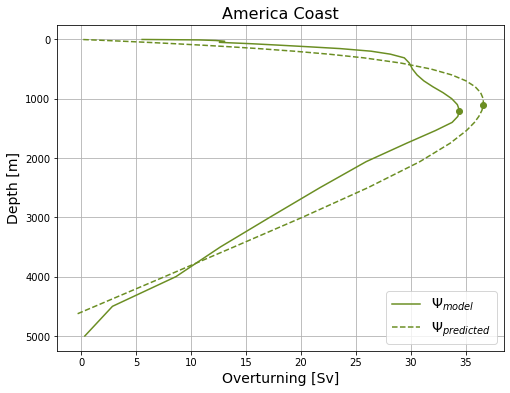

<xarray.DataArray 'vmo' ()>
array(34.42898, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1200.)
Coordinates:
    z_l      float64 1.2e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [62]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_am = []

sfn_am = sfn_small_resmean_am.sel(yq=slice(lat_s,lat_n))

psi_max_am = np.amax(sfn_am, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_am, sfn_small_resmean_am.z_l, color='olivedrab', label='$\Psi_{model}$')
ax.plot(Psi_am, Psi_am.zl, color='olivedrab', linestyle='dashed', label='$\Psi_{predicted}$')
ax.plot(Psi_am.max(), Psi_max_depth_am, color='olivedrab', marker='o', markersize=6)
ax.plot(psi_max_am.max(), max_depth_am, color='olivedrab', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_am, fontsize=16)
plt.show()

print(psi_max_am.max(), 'Sv')
print(max_depth_am)

In [63]:
# Africa Coast calculation
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rhoterm1_tmp = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (delta_rho_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1_af = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2_af = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (delta_rho_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2_af[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_af = constant * (term1_af - term2_af)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_af_tmp = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (Vz_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_af_tmp[i] = integ.values

Psi_af = (Psi_af_tmp*Lx_af)/(1e6)

print(Psi_af.max())

max_index = np.where(Psi_af == Psi_af.max())
    
Psi_max_depth_af = Psi_af.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_af)


<xarray.DataArray 'thetao' ()>
array(27.05610923)
<xarray.DataArray 'zl' ()>
array(900.)
Coordinates:
    zl       float64 900.0
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


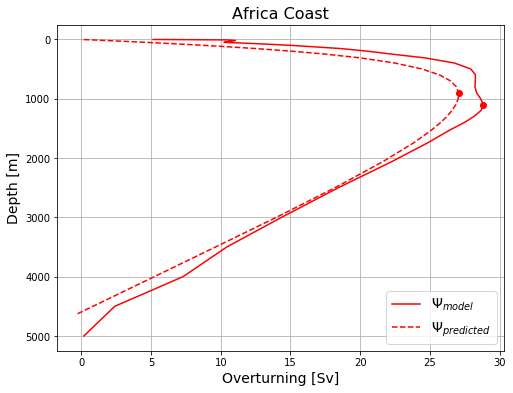

<xarray.DataArray 'vmo' ()>
array(28.83817, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1100.)
Coordinates:
    z_l      float64 1.1e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [64]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_af = []

sfn_af = sfn_small_resmean_af.sel(yq=slice(lat_s,lat_n))

psi_max_af = np.amax(sfn_af, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_af, sfn_small_resmean_af.z_l, color='r', label='$\Psi_{model}$')
ax.plot(Psi_af, Psi_af.zl, color='r', linestyle='dashed', label='$\Psi_{predicted}$')
ax.plot(Psi_af.max(), Psi_max_depth_af, color='r', marker='o', markersize=6)
ax.plot(psi_max_af.max(), max_depth_af, color='r', marker='o', markersize=6)
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title(case_af, fontsize=16)
plt.show()

print(psi_max_af.max(), 'Sv')
print(max_depth_af)

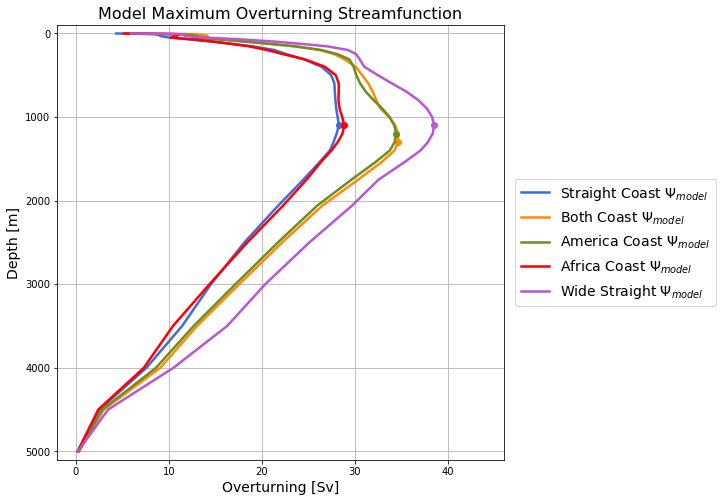

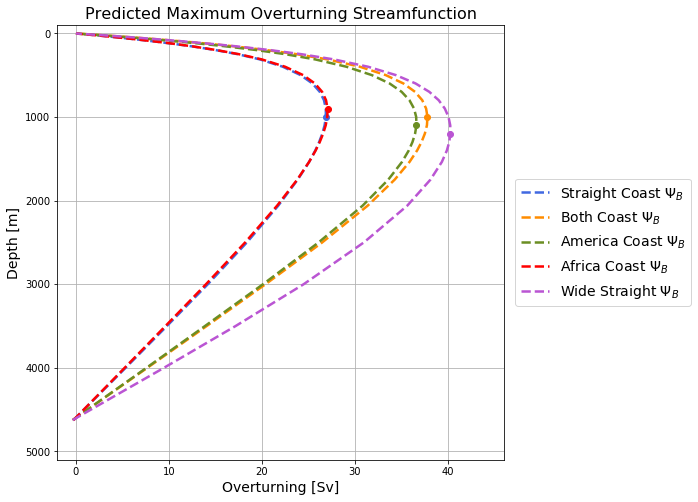

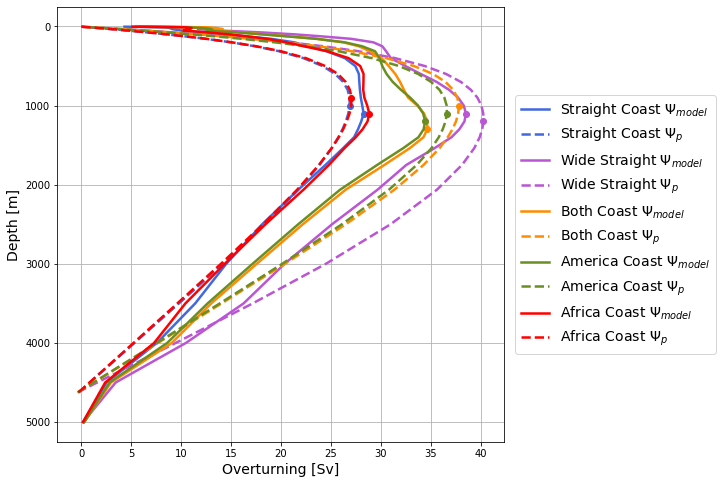

In [65]:
width = 2.5

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(psi_max_straight, psi_max_straight.z_l, 
        color='royalblue', linewidth=width, label='Straight Coast $\Psi_{model}$')
ax.plot(psi_max_straight.max(), max_depth_straight, color='royalblue', marker='o', markersize=6)

ax.plot(psi_max_both, psi_max_both.z_l, 
        color='darkorange', linewidth=width, label='Both Coast $\Psi_{model}$')
ax.plot(psi_max_both.max(), max_depth_both, color='darkorange', marker='o', markersize=6)

ax.plot(psi_max_am, psi_max_am.z_l, 
        color='olivedrab', linewidth=width, label='America Coast $\Psi_{model}$')
ax.plot(psi_max_am.max(), max_depth_am, color='olivedrab', marker='o', markersize=6)

ax.plot(psi_max_af, psi_max_af.z_l, 
        color='r', linewidth=width, label='Africa Coast $\Psi_{model}$')
ax.plot(psi_max_af.max(), max_depth_af, color='r', marker='o', markersize=6)

ax.plot(psi_max_wide, psi_max_wide.z_l, 
        color='mediumorchid', linewidth=width, label='Wide Straight $\Psi_{model}$')
ax.plot(psi_max_wide.max(), max_depth_wide, color='mediumorchid', marker='o', markersize=6)

plt.xlim([-2, 46]), plt.ylim([-100, 5100])
plt.gca().invert_yaxis(), plt.grid()
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Model Maximum Overturning Streamfunction', fontsize=16)
plt.show()


fig, ax = plt.subplots(figsize=(8,8))

ax.plot(Psi_straight, Psi_straight.zl, 
        color='royalblue', linestyle='dashed', linewidth=width, label='Straight Coast $\Psi_{B}$')
ax.plot(Psi_straight.max(), Psi_max_depth_straight, color='royalblue', marker='o', markersize=6)

ax.plot(Psi_both, Psi_both.zl, 
        color='darkorange', linestyle='dashed', linewidth=width, label='Both Coast $\Psi_{B}$')
ax.plot(Psi_both.max(), Psi_max_depth_both, color='darkorange', marker='o', markersize=6)

ax.plot(Psi_am, Psi_am.zl, 
        color='olivedrab', linestyle='dashed', linewidth=width, label='America Coast $\Psi_{B}$')
ax.plot(Psi_am.max(), Psi_max_depth_am, color='olivedrab', marker='o', markersize=6)

ax.plot(Psi_af, Psi_af.zl, 
        color='r', linestyle='dashed', linewidth=width, label='Africa Coast $\Psi_{B}$')
ax.plot(Psi_af.max(), Psi_max_depth_af, color='r', marker='o', markersize=6)

ax.plot(Psi_wide, Psi_wide.zl, 
        color='mediumorchid', linestyle='dashed', linewidth=width, label='Wide Straight $\Psi_{B}$')
ax.plot(Psi_wide.max(), Psi_max_depth_wide, color='mediumorchid', marker='o', markersize=6)

plt.xlim([-2, 46]), plt.ylim([-100, 5100])
plt.gca().invert_yaxis(), plt.grid()
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Predicted Maximum Overturning Streamfunction', fontsize=16)
plt.show()


fig, ax = plt.subplots(figsize=(8,8))

ax.plot(psi_max_straight, psi_max_straight.z_l, 
        color='royalblue', linewidth=width, label='Straight Coast $\Psi_{model}$')
ax.plot(Psi_straight, Psi_straight.zl, 
        color='royalblue', linestyle='dashed', linewidth=width, label='Straight Coast $\Psi_{p}$')
ax.plot(Psi_straight.max(), Psi_max_depth_straight, color='royalblue', marker='o', markersize=6)
ax.plot(psi_max_straight.max(), max_depth_straight, color='royalblue', marker='o', markersize=6)

ax.plot(psi_max_wide, psi_max_wide.z_l, 
        color='mediumorchid', linewidth=width, label='Wide Straight $\Psi_{model}$')
ax.plot(Psi_wide, Psi_wide.zl, 
        color='mediumorchid', linestyle='dashed', linewidth=width, label='Wide Straight $\Psi_{p}$')
ax.plot(Psi_wide.max(), Psi_max_depth_wide, color='mediumorchid', marker='o', markersize=6)
ax.plot(psi_max_wide.max(), max_depth_wide, color='mediumorchid', marker='o', markersize=6)


ax.plot(psi_max_both, psi_max_both.z_l, 
        color='darkorange', linewidth=width, label='Both Coast $\Psi_{model}$')
ax.plot(Psi_both, Psi_both.zl, 
        color='darkorange', linestyle='dashed', linewidth=width, label='Both Coast $\Psi_{p}$')
ax.plot(Psi_both.max(), Psi_max_depth_both, color='darkorange', marker='o', markersize=6)
ax.plot(psi_max_both.max(), max_depth_both, color='darkorange', marker='o', markersize=6)

ax.plot(psi_max_am, psi_max_am.z_l, 
        color='olivedrab', linewidth=width, label='America Coast $\Psi_{model}$')
ax.plot(Psi_am, Psi_am.zl, 
        color='olivedrab', linestyle='dashed', linewidth=width, label='America Coast $\Psi_{p}$')
ax.plot(Psi_am.max(), Psi_max_depth_am, color='olivedrab', marker='o', markersize=6)
ax.plot(psi_max_am.max(), max_depth_am, color='olivedrab', marker='o', markersize=6)

ax.plot(psi_max_af, psi_max_af.z_l, 
        color='r', linewidth=width, label='Africa Coast $\Psi_{model}$')
ax.plot(Psi_af, Psi_af.zl, 
        color='r', linestyle='dashed', linewidth=width, label='Africa Coast $\Psi_{p}$')
ax.plot(Psi_af.max(), Psi_max_depth_af, color='r', marker='o', markersize=6)
ax.plot(psi_max_af.max(), max_depth_af, color='r', marker='o', markersize=6)

plt.gca().invert_yaxis(), plt.grid()
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

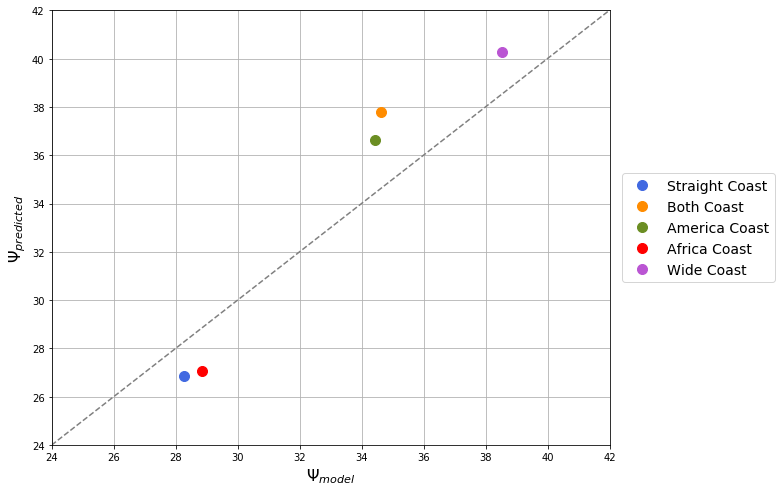

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(psi_max_straight.max(), Psi_straight.max(), 'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(psi_max_both.max(), Psi_both.max(), 'o', color='darkorange', markersize=10, label=case_both)
ax.plot(psi_max_am.max(), Psi_am.max(), 'o', color='olivedrab', markersize=10, label=case_am)
ax.plot(psi_max_af.max(), Psi_af.max(), 'o', color='r', markersize=10, label=case_af)
ax.plot(psi_max_wide.max(), Psi_wide.max(), 'o', color='mediumorchid', markersize=10, label=case_wide)
plt.xlabel('$\Psi_{model}$', fontsize=16), plt.ylabel('$\Psi_{predicted}$', fontsize=16)
plt.grid()
plt.plot([24,45], [24,45], color='gray', linestyle='dashed')
plt.xlim([24,42]), plt.ylim([24,42])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

# plot the 1 to 1 line

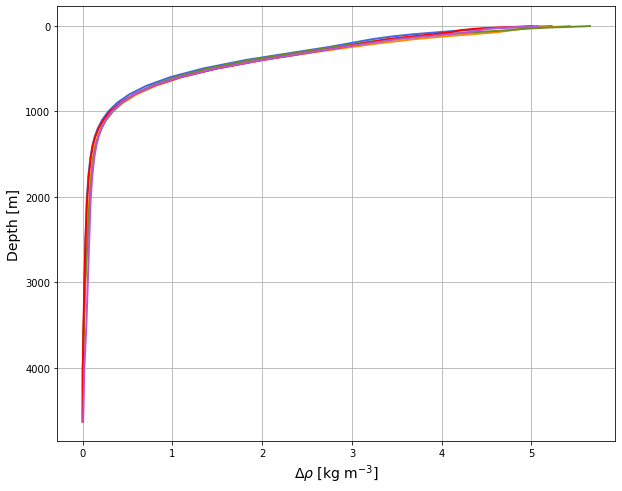

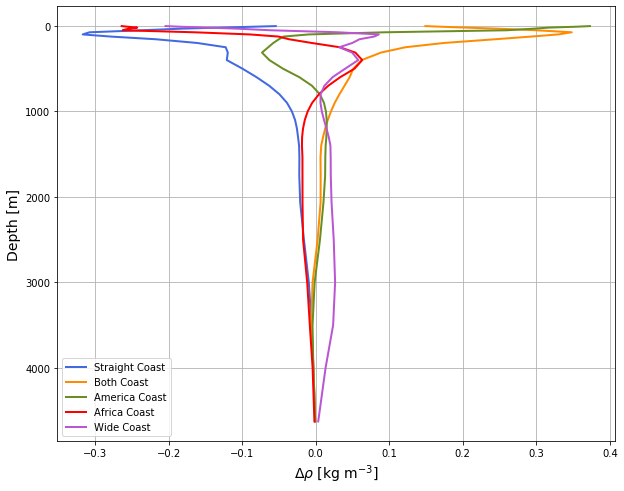

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(delta_rho_straight, delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax.plot(delta_rho_both, delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax.plot(delta_rho_am, delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax.plot(delta_rho_af, delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax.plot(delta_rho_wide, delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
plt.gca().invert_yaxis(), plt.grid()
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=14)
plt.show()


mean_rho = (delta_rho_straight + delta_rho_both + delta_rho_am + delta_rho_af + delta_rho_wide) / 5

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(delta_rho_straight-mean_rho, delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax.plot(delta_rho_both-mean_rho, delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax.plot(delta_rho_am-mean_rho, delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax.plot(delta_rho_af-mean_rho, delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax.plot(delta_rho_wide-mean_rho, delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
plt.gca().invert_yaxis(), plt.grid()
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=14)
plt.legend()
plt.show()


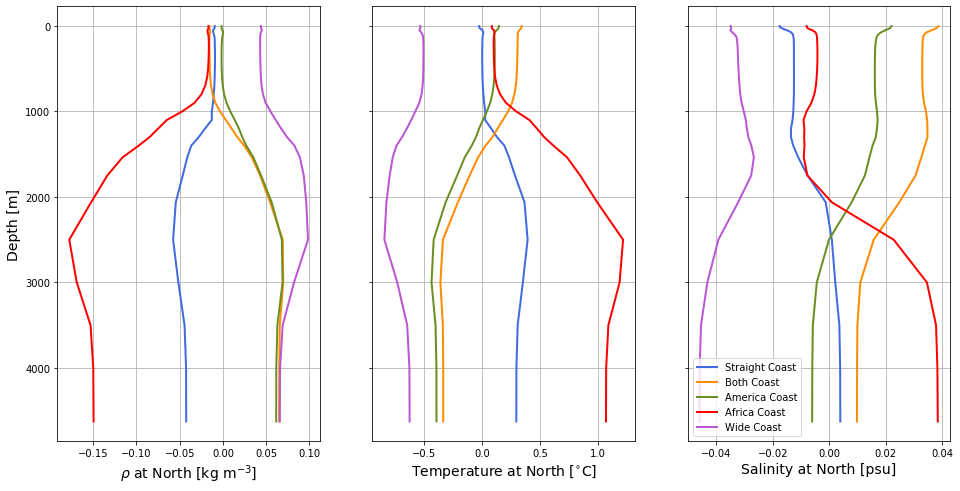

In [29]:
mean_rho_north = (rho_north_straight.mean(dim='yh').mean(dim='xh') + 
                  rho_north_both.mean(dim='yh').mean(dim='xh') + 
                  rho_north_am.mean(dim='yh').mean(dim='xh') + 
                  rho_north_af.mean(dim='yh').mean(dim='xh') + 
                  rho_north_wide.mean(dim='yh').mean(dim='xh'))/5

temp_north_straight = dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_both = dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_am = dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_af = dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
temp_north_wide = dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time')

mean_temp_north = (temp_north_straight.mean(dim='yh').mean(dim='xh') +
                  temp_north_both.mean(dim='yh').mean(dim='xh') + 
                  temp_north_am.mean(dim='yh').mean(dim='xh') +
                  temp_north_af.mean(dim='yh').mean(dim='xh') +
                  temp_north_wide.mean(dim='yh').mean(dim='xh')) / 5

salt_north_straight = dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_both = dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_am = dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_af = dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time')
salt_north_wide = dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time')

mean_salt_north = (salt_north_straight.mean(dim='yh').mean(dim='xh') +
                  salt_north_both.mean(dim='yh').mean(dim='xh') +
                  salt_north_am.mean(dim='yh').mean(dim='xh') +
                  salt_north_af.mean(dim='yh').mean(dim='xh') +
                  salt_north_wide.mean(dim='yh').mean(dim='xh')) / 5

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_north_straight.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
        delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[0].plot(rho_north_both.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[0].plot(rho_north_am.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[0].plot(rho_north_af.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[0].plot(rho_north_wide.mean(dim='yh').mean(dim='xh')-mean_rho_north, 
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[0].set_xlabel(r'$\rho$ at North [kg m$^{-3}$]', fontsize=14)
ax[0].grid()

ax[1].plot(temp_north_straight.mean(dim='yh').mean(dim='xh')-mean_temp_north, 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[1].plot(temp_north_both.mean(dim='yh').mean(dim='xh')-mean_temp_north, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[1].plot(temp_north_am.mean(dim='yh').mean(dim='xh')-mean_temp_north,  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[1].plot(temp_north_af.mean(dim='yh').mean(dim='xh')-mean_temp_north,  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[1].plot(temp_north_wide.mean(dim='yh').mean(dim='xh')-mean_temp_north,  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[1].set_xlabel(r'Temperature at North [$^{\circ}$C]', fontsize=14)
ax[1].grid()

ax[2].plot(salt_north_straight.mean(dim='yh').mean(dim='xh')-mean_salt_north, 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[2].plot(salt_north_both.mean(dim='yh').mean(dim='xh')-mean_salt_north, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[2].plot(salt_north_am.mean(dim='yh').mean(dim='xh')-mean_salt_north,  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[2].plot(salt_north_af.mean(dim='yh').mean(dim='xh')-mean_salt_north,  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[2].plot(salt_north_wide.mean(dim='yh').mean(dim='xh')-mean_salt_north,  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[2].set_xlabel('Salinity at North [psu]', fontsize=14)

ax[2].grid()
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()



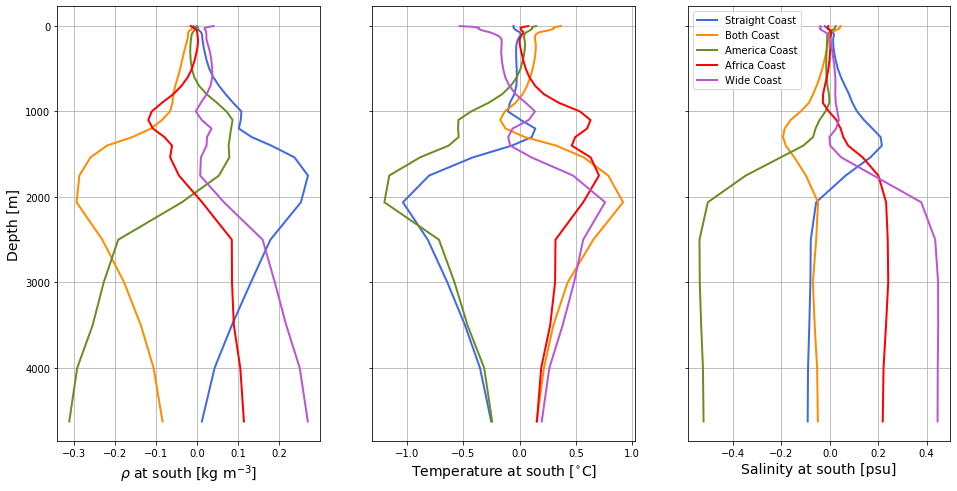

In [30]:
mean_rho_south = (rho_south_straight.mean(dim='yh').mean(dim='xh') + 
                  rho_south_both.mean(dim='yh').mean(dim='xh') + 
                  rho_south_am.mean(dim='yh').mean(dim='xh') + 
                  rho_south_af.mean(dim='yh').mean(dim='xh') + 
                  rho_south_wide.mean(dim='yh').mean(dim='xh'))/5

temp_south_straight = dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_both = dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_am = dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_af = dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')
temp_south_wide = dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time')

mean_temp_south = (temp_south_straight.mean(dim='yh').mean(dim='xh') +
                  temp_south_both.mean(dim='yh').mean(dim='xh') + 
                  temp_south_am.mean(dim='yh').mean(dim='xh') +
                  temp_south_af.mean(dim='yh').mean(dim='xh') +
                  temp_south_wide.mean(dim='yh').mean(dim='xh')) / 5

salt_south_straight = dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_both = dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_am = dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_af = dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time')
salt_south_wide = dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time')

mean_salt_south = (salt_south_straight.mean(dim='yh').mean(dim='xh') +
                  salt_south_both.mean(dim='yh').mean(dim='xh') +
                  salt_south_am.mean(dim='yh').mean(dim='xh') +
                  salt_south_af.mean(dim='yh').mean(dim='xh') +
                  salt_south_wide.mean(dim='yh').mean(dim='xh')) / 5

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
ax[0].plot(rho_south_straight.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
        delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[0].plot(rho_south_both.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[0].plot(rho_south_am.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[0].plot(rho_south_af.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[0].plot(rho_south_wide.mean(dim='yh').mean(dim='xh')-mean_rho_south, 
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[0].set_xlabel(r'$\rho$ at south [kg m$^{-3}$]', fontsize=14)
ax[0].grid()

ax[1].plot(temp_south_straight.mean(dim='yh').mean(dim='xh')-mean_temp_south, 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[1].plot(temp_south_both.mean(dim='yh').mean(dim='xh')-mean_temp_south, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[1].plot(temp_south_am.mean(dim='yh').mean(dim='xh')-mean_temp_south,  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[1].plot(temp_south_af.mean(dim='yh').mean(dim='xh')-mean_temp_south,  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[1].plot(temp_south_wide.mean(dim='yh').mean(dim='xh')-mean_temp_south,  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[1].set_xlabel(r'Temperature at south [$^{\circ}$C]', fontsize=14)
ax[1].grid()

ax[2].plot(salt_south_straight.mean(dim='yh').mean(dim='xh')-mean_salt_south, 
           delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
ax[2].plot(salt_south_both.mean(dim='yh').mean(dim='xh')-mean_salt_south, 
        delta_rho_both.zl, color='darkorange', linewidth=2, label=case_both)
ax[2].plot(salt_south_am.mean(dim='yh').mean(dim='xh')-mean_salt_south,  
        delta_rho_am.zl, color='olivedrab', linewidth=2, label=case_am)
ax[2].plot(salt_south_af.mean(dim='yh').mean(dim='xh')-mean_salt_south,  
        delta_rho_af.zl, color='r', linewidth=2, label=case_af)
ax[2].plot(salt_south_wide.mean(dim='yh').mean(dim='xh')-mean_salt_south,  
           delta_rho_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
ax[2].set_xlabel('Salinity at south [psu]', fontsize=14)

ax[2].grid()
plt.gca().invert_yaxis()
ax[0].set_ylabel('Depth [m]', fontsize=14), 
plt.legend()
plt.show()

In [31]:
# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(1, term1_straight, 'o', color='royalblue', markersize=10)
# ax.plot(2, term1_both, 'o', color='darkorange', markersize=10)
# ax.plot(3, term1_am, 'o', color='olivedrab', markersize=10)
# ax.plot(4, term1_af, 'o', color='r', markersize=10)
# ax.plot(5, term1_wide, 'o', color='mediumorchid', markersize=10)
# # plt.gca().invert_yaxis(), plt.grid()
# plt.xticks(np.arange(1,6), [case_straight, case_both, case_am, case_af, case_wide], fontsize=13)
# plt.ylabel(r'$\frac{1}{h} \ \int \int \Delta \rho \ dz$ [kg m$^{-2}$]', fontsize=14)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(1, (delta_rho_straight*dz).sum(dim='zl'), 'o', color='royalblue', markersize=10)
# ax.plot(2, (delta_rho_both*dz).sum(dim='zl'), 'o', color='darkorange', markersize=10)
# ax.plot(3, (delta_rho_am*dz).sum(dim='zl'), 'o', color='olivedrab', markersize=10)
# ax.plot(4, (delta_rho_af*dz).sum(dim='zl'), 'o', color='r', markersize=10)
# ax.plot(5, (delta_rho_wide*dz).sum(dim='zl'), 'o', color='mediumorchid', markersize=10)
# # plt.gca().invert_yaxis(), plt.grid()
# plt.xticks(np.arange(1,6), [case_straight, case_both, case_am, case_af, case_wide], fontsize=13)
# plt.ylabel(r'$\int \Delta \rho \ dz$ [kg m$^{-2}$]', fontsize=14)
# plt.show()

In [32]:
# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(1, rho_north_straight.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='royalblue', markersize=10,label=case_straight)
# ax.plot(1, rho_south_straight.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='royalblue', markersize=10,label=case_straight)
# ax.plot(2, rho_north_both.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='darkorange', markersize=10,label=case_straight)
# ax.plot(2, rho_south_both.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='darkorange', markersize=10,label=case_straight)
# ax.plot(3, rho_north_am.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='olivedrab', markersize=10,label=case_straight)
# ax.plot(3, rho_south_am.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='olivedrab', markersize=10,label=case_straight)
# ax.plot(4, rho_north_af.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='r', markersize=10,label=case_straight)
# ax.plot(4, rho_south_af.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='r', markersize=10,label=case_straight)
# ax.plot(5, rho_north_wide.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='mediumorchid', markersize=10,label=case_straight)
# ax.plot(5, rho_south_wide.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='mediumorchid', markersize=10,label=case_straight)

# plt.xticks(np.arange(1,6), [case_straight, case_both, case_am, case_af, case_wide], fontsize=13)
# plt.ylabel(r'$\int \Delta \rho \ dz$ [kg m$^{-2}$]', fontsize=14)
# plt.show()

# integrate from surface to 1000m?

In [33]:
# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(rho_north_straight.mean(dim='yh').mean(dim='xh'), rho_north_straight.zl, 
#         color='royalblue', linewidth=2, label='{} North'.format(case_straight))
# ax.plot(rho_south_straight.mean(dim='yh').mean(dim='xh'), rho_north_straight.zl,
#         color='royalblue', linewidth=2, linestyle='dashed', label='{} South'.format(case_straight))

# ax.plot(rho_north_both.mean(dim='yh').mean(dim='xh'), rho_north_both.zl, 
#         color='darkorange', linewidth=2, label='{} North'.format(case_both))
# ax.plot(rho_south_both.mean(dim='yh').mean(dim='xh'), rho_south_both.zl,
#         color='darkorange', linewidth=2, linestyle='dashed', label='{} South'.format(case_both))

# ax.plot(rho_north_am.mean(dim='yh').mean(dim='xh'), rho_north_am.zl,
#         color='olivedrab', linewidth=2, label='{} North'.format(case_am))
# ax.plot(rho_south_am.mean(dim='yh').mean(dim='xh'), rho_south_am.zl, 
#         color='olivedrab', linewidth=2, linestyle='dashed', label='{} South'.format(case_am))

# ax.plot(rho_north_af.mean(dim='yh').mean(dim='xh'), rho_north_af.zl,
#         color='r', linewidth=2, label='{} North'.format(case_af))
# ax.plot(rho_south_af.mean(dim='yh').mean(dim='xh'), rho_north_af.zl, 
#         color='r', linewidth=2, linestyle='dashed', label='{} South'.format(case_af))

# ax.plot(rho_north_wide.mean(dim='yh').mean(dim='xh'), rho_north_wide.zl,
#         color='mediumorchid', linewidth=2, label='{} North'.format(case_wide))
# ax.plot(rho_south_wide.mean(dim='yh').mean(dim='xh'), rho_south_wide.zl, 
#         color='mediumorchid', linewidth=2, linestyle='dashed', label='{} South'.format(case_wide))

# plt.gca().invert_yaxis()
# plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
# plt.ylabel('Depth [m]')
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(rho_north_straight.mean(dim='yh').mean(dim='xh'), rho_north_straight.zl, 
#         color='royalblue', linewidth=2, label='{} North'.format(case_straight))
# ax.plot(rho_south_straight.mean(dim='yh').mean(dim='xh'), rho_north_straight.zl,
#         color='royalblue', linewidth=2, linestyle='dashed', label='{} South'.format(case_straight))

# ax.plot(rho_north_both.mean(dim='yh').mean(dim='xh'), rho_north_both.zl, 
#         color='darkorange', linewidth=2, label='{} North'.format(case_both))
# ax.plot(rho_south_both.mean(dim='yh').mean(dim='xh'), rho_south_both.zl,
#         color='darkorange', linewidth=2, linestyle='dashed', label='{} South'.format(case_both))

# ax.plot(rho_north_am.mean(dim='yh').mean(dim='xh'), rho_north_am.zl,
#         color='olivedrab', linewidth=2, label='{} North'.format(case_am))
# ax.plot(rho_south_am.mean(dim='yh').mean(dim='xh'), rho_south_am.zl, 
#         color='olivedrab', linewidth=2, linestyle='dashed', label='{} South'.format(case_am))

# ax.plot(rho_north_af.mean(dim='yh').mean(dim='xh'), rho_north_af.zl,
#         color='r', linewidth=2, label='{} North'.format(case_af))
# ax.plot(rho_south_af.mean(dim='yh').mean(dim='xh'), rho_north_af.zl, 
#         color='r', linewidth=2, linestyle='dashed', label='{} South'.format(case_af))

# ax.plot(rho_north_wide.mean(dim='yh').mean(dim='xh'), rho_north_wide.zl,
#         color='mediumorchid', linewidth=2, label='{} North'.format(case_wide))
# ax.plot(rho_south_wide.mean(dim='yh').mean(dim='xh'), rho_south_wide.zl, 
#         color='mediumorchid', linewidth=2, linestyle='dashed', label='{} South'.format(case_wide))

# plt.ylim([0,1000])
# plt.gca().invert_yaxis()
# plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
# plt.ylabel('Depth [m]')
# plt.show()

### Is the density gradient driven by temperature or salinity?
use the temperature from the control, straight coast, run to calculate the density gradient from each case.

In [34]:
# calculate to_ref_north and to_ref_south with thermal expansion and haline contraction coefficients


In [35]:
to_ref_north = (dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values+
                dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values+
                dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time').values+
                dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values+
                dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values)/5
to_ref_south = (dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time').values +
          dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time').values +
          dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time').values +
          dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time').values +
          dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time').values)/5


# Holding temperature fixed

rho_temp_north_straight = calc_sigma_wright(
    dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_straight = calc_sigma_wright(
    dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_straight_tmp = rho_temp_north_straight.copy()
delta_rho_temp_straight_tmp.values = rho_temp_north_straight.values-rho_temp_south_straight.values
delta_rho_temp_straight = delta_rho_temp_straight_tmp.mean(dim='yh').mean(dim='xh')
          
rho_temp_north_both = calc_sigma_wright(
    dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_both = calc_sigma_wright(
    dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_both_tmp = rho_temp_north_both.copy()
delta_rho_temp_both_tmp.values = rho_temp_north_both.values-rho_temp_south_both.values
delta_rho_temp_both = delta_rho_temp_both_tmp.mean(dim='yh').mean(dim='xh')

rho_temp_north_wide = calc_sigma_wright(
    dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_wide = calc_sigma_wright(
    dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_wide_tmp = rho_temp_north_wide.copy()
delta_rho_temp_wide_tmp.values = rho_temp_north_wide.values-rho_temp_south_wide.values
delta_rho_temp_wide = delta_rho_temp_wide_tmp.mean(dim='yh').mean(dim='xh')

rho_temp_north_am = calc_sigma_wright(
    dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_am = calc_sigma_wright(
    dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_am_tmp = rho_temp_north_am.copy()
delta_rho_temp_am_tmp.values = rho_temp_north_am.values-rho_temp_south_am.values
delta_rho_temp_am = delta_rho_temp_am_tmp.mean(dim='yh').mean(dim='xh')

rho_temp_north_af = calc_sigma_wright(
    dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'),
    to_ref_north)

rho_temp_south_af = calc_sigma_wright(
    dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'),
    to_ref_south)

delta_rho_temp_af_tmp = rho_temp_north_af.copy()
delta_rho_temp_af_tmp.values = rho_temp_north_af.values-rho_temp_south_af.values
delta_rho_temp_af = delta_rho_temp_af_tmp.mean(dim='yh').mean(dim='xh')

In [36]:
# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(1, rho_north_straight.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='royalblue', markersize=10,label=case_straight)
# ax.plot(1, rho_south_straight.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='royalblue', markersize=10,label=case_straight)
# ax.plot(2, rho_temp_north_both.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='darkorange', markersize=10,label=case_straight)
# ax.plot(2, rho_temp_south_both.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='darkorange', markersize=10,label=case_straight)
# ax.plot(3, rho_temp_north_am.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='olivedrab', markersize=10,label=case_straight)
# ax.plot(3, rho_temp_south_am.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='olivedrab', markersize=10,label=case_straight)
# ax.plot(4, rho_temp_north_af.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='r', markersize=10,label=case_straight)
# ax.plot(4, rho_temp_south_af.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='r', markersize=10,label=case_straight)
# ax.plot(5, rho_temp_north_wide.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='mediumorchid', markersize=10,label=case_straight)
# ax.plot(5, rho_temp_south_wide.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='mediumorchid', markersize=10,label=case_straight)

# plt.xticks(np.arange(1,6), [case_straight, case_both, case_am, case_af, case_wide], fontsize=13)
# plt.ylabel(r'$\int \Delta \rho \ dz$ [kg m$^{-2}$]', fontsize=14)
# plt.title('Temperature Held Fixed', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(rho_north_straight.mean(dim='yh').mean(dim='xh'), rho_north_straight.zl, 
#         color='royalblue', linewidth=2, label='{} North'.format(case_straight))
# ax.plot(rho_south_straight.mean(dim='yh').mean(dim='xh'), rho_south_straight.zl,
#         color='royalblue', linewidth=2, linestyle='dashed', label='{} South'.format(case_straight))

# ax.plot(rho_temp_north_both.mean(dim='yh').mean(dim='xh'), rho_temp_north_both.zl, 
#         color='darkorange', linewidth=2, label='{} North'.format(case_both))
# ax.plot(rho_temp_south_both.mean(dim='yh').mean(dim='xh'), rho_temp_south_both.zl,
#         color='darkorange', linewidth=2, linestyle='dashed', label='{} South'.format(case_both))

# ax.plot(rho_temp_north_am.mean(dim='yh').mean(dim='xh'), rho_temp_north_am.zl,
#         color='olivedrab', linewidth=2, label='{} North'.format(case_am))
# ax.plot(rho_temp_south_am.mean(dim='yh').mean(dim='xh'), rho_temp_south_am.zl, 
#         color='olivedrab', linewidth=2, linestyle='dashed', label='{} South'.format(case_am))

# ax.plot(rho_temp_north_af.mean(dim='yh').mean(dim='xh'), rho_temp_north_af.zl,
#         color='r', linewidth=2, label='{} North'.format(case_af))
# ax.plot(rho_temp_south_af.mean(dim='yh').mean(dim='xh'), rho_temp_south_af.zl, 
#         color='r', linewidth=2, linestyle='dashed', label='{} South'.format(case_af))

# ax.plot(rho_temp_north_wide.mean(dim='yh').mean(dim='xh'), rho_temp_north_wide.zl,
#         color='mediumorchid', linewidth=2, label='{} North'.format(case_wide))
# ax.plot(rho_temp_south_wide.mean(dim='yh').mean(dim='xh'), rho_temp_south_wide.zl, 
#         color='mediumorchid', linewidth=2, linestyle='dashed', label='{} South'.format(case_wide))

# plt.gca().invert_yaxis()
# plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
# plt.ylabel('Depth [m]')
# plt.title('Temperature Held Fixed', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(rho_north_straight.mean(dim='yh').mean(dim='xh'), rho_north_straight.zl, 
#         color='royalblue', linewidth=2, label='{} North'.format(case_straight))
# ax.plot(rho_south_straight.mean(dim='yh').mean(dim='xh'), rho_south_straight.zl,
#         color='royalblue', linewidth=2, linestyle='dashed', label='{} South'.format(case_straight))

# ax.plot(rho_temp_north_both.mean(dim='yh').mean(dim='xh'), rho_temp_north_both.zl, 
#         color='darkorange', linewidth=2, label='{} North'.format(case_both))
# ax.plot(rho_temp_south_both.mean(dim='yh').mean(dim='xh'), rho_temp_south_both.zl,
#         color='darkorange', linewidth=2, linestyle='dashed', label='{} South'.format(case_both))

# ax.plot(rho_temp_north_am.mean(dim='yh').mean(dim='xh'), rho_temp_north_am.zl,
#         color='olivedrab', linewidth=2, label='{} North'.format(case_am))
# ax.plot(rho_temp_south_am.mean(dim='yh').mean(dim='xh'), rho_temp_south_am.zl, 
#         color='olivedrab', linewidth=2, linestyle='dashed', label='{} South'.format(case_am))

# ax.plot(rho_temp_north_af.mean(dim='yh').mean(dim='xh'), rho_temp_north_af.zl,
#         color='r', linewidth=2, label='{} North'.format(case_af))
# ax.plot(rho_temp_south_af.mean(dim='yh').mean(dim='xh'), rho_temp_south_af.zl, 
#         color='r', linewidth=2, linestyle='dashed', label='{} South'.format(case_af))

# ax.plot(rho_temp_north_wide.mean(dim='yh').mean(dim='xh'), rho_temp_north_wide.zl,
#         color='mediumorchid', linewidth=2, label='{} North'.format(case_wide))
# ax.plot(rho_temp_south_wide.mean(dim='yh').mean(dim='xh'), rho_temp_south_wide.zl, 
#         color='mediumorchid', linewidth=2, linestyle='dashed', label='{} South'.format(case_wide))

# plt.ylim([0,1000])
# plt.gca().invert_yaxis()
# plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
# plt.ylabel('Depth [m]')
# plt.title('Temperature Held Fixed', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(delta_rho_straight, delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_temp_both, delta_rho_temp_both.zl, color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_temp_am, delta_rho_temp_am.zl, color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_temp_af, delta_rho_temp_af.zl, color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_temp_wide, delta_rho_temp_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
# plt.gca().invert_yaxis(), plt.grid()
# plt.ylabel('Depth [m]', fontsize=14), plt.xlabel(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=14)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# # ax.plot(delta_rho_straight, delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_temp_both-delta_rho_both, delta_rho_temp_both.zl, color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_temp_am-delta_rho_am, delta_rho_temp_am.zl, color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_temp_af-delta_rho_af, delta_rho_temp_af.zl, color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_temp_wide-delta_rho_wide, delta_rho_temp_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
# plt.gca().invert_yaxis(), plt.grid()
# plt.ylabel('Depth [m]', fontsize=14)
# plt.xlabel(r'$\Delta \rho$ [kg m$^{-3}$] Fixed Temp - Varying Temp', fontsize=14)
# plt.show()

### Is the density gradient driven by temperature or salinity?
use the average salt from all cases as a reference salinity, run to calculate the density gradient from each case.

In [37]:
so_ref_north = (dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values +
          dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values +
          dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time').values +
          dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values +
          dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time').values)/5          
so_ref_south = (dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time').values+
               dy_both.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time').values +
               dy_wide.so.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time').values +
               dy_am.so.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time').values +
               dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time').values)/5 

# Holding salinity fixed

rho_salt_north_straight = calc_sigma_wright(
    so_ref_north,
    dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_straight = calc_sigma_wright(
    so_ref_south,
    dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_straight_tmp = rho_salt_north_straight.copy()
delta_rho_salt_straight_tmp.values = rho_salt_north_straight.values-rho_salt_south_straight.values
delta_rho_salt_straight = delta_rho_salt_straight_tmp.mean(dim='yh').mean(dim='xh')

rho_salt_north_both = calc_sigma_wright(
    so_ref_north,
    dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_both = calc_sigma_wright(
    so_ref_south,
    dy_both.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_both_tmp = rho_salt_north_both.copy()
delta_rho_salt_both_tmp.values = rho_salt_north_both.values-rho_salt_south_both.values
delta_rho_salt_both = delta_rho_salt_both_tmp.mean(dim='yh').mean(dim='xh')

rho_salt_north_wide = calc_sigma_wright(
    so_ref_north,
    dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_wide = calc_sigma_wright(
    so_ref_south,
    dy_wide.thetao.sel(xh=slice(238,241)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_wide_tmp = rho_salt_north_wide.copy()
delta_rho_salt_wide_tmp.values = rho_salt_north_wide.values-rho_salt_south_wide.values
delta_rho_salt_wide = delta_rho_salt_wide_tmp.mean(dim='yh').mean(dim='xh')

rho_salt_north_am = calc_sigma_wright(
    so_ref_north,
    dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_am = calc_sigma_wright(
    so_ref_south,
    dy_am.thetao.sel(xh=slice(242,245)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_am_tmp = rho_salt_north_am.copy()
delta_rho_salt_am_tmp.values = rho_salt_north_am.values-rho_salt_south_am.values
delta_rho_salt_am = delta_rho_salt_am_tmp.mean(dim='yh').mean(dim='xh')

rho_salt_north_af = calc_sigma_wright(
    so_ref_north,
    dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).mean(dim='time'))

rho_salt_south_af = calc_sigma_wright(
    so_ref_south,
    dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).mean(dim='time'))

delta_rho_salt_af_tmp = rho_salt_north_af.copy()
delta_rho_salt_af_tmp.values = rho_salt_north_af.values-rho_salt_south_af.values
delta_rho_salt_af = delta_rho_salt_af_tmp.mean(dim='yh').mean(dim='xh')

In [38]:
# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(1, rho_north_straight.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='royalblue', markersize=10,label=case_straight)
# ax.plot(1, rho_south_straight.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='royalblue', markersize=10,label=case_straight)
# ax.plot(2, rho_salt_north_both.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='darkorange', markersize=10,label=case_straight)
# ax.plot(2, rho_salt_south_both.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='darkorange', markersize=10,label=case_straight)
# ax.plot(3, rho_salt_north_am.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='olivedrab', markersize=10,label=case_straight)
# ax.plot(3, rho_salt_south_am.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='olivedrab', markersize=10,label=case_straight)
# ax.plot(4, rho_salt_north_af.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='r', markersize=10,label=case_straight)
# ax.plot(4, rho_salt_south_af.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='r', markersize=10,label=case_straight)
# ax.plot(5, rho_salt_north_wide.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "^", color='mediumorchid', markersize=10,label=case_straight)
# ax.plot(5, rho_salt_south_wide.mean(dim='yh').mean(dim='xh').sum(dim='zl'), 
#         "v", color='mediumorchid', markersize=10,label=case_straight)

# plt.xticks(np.arange(1,6), [case_straight, case_both, case_am, case_af, case_wide], fontsize=13)
# plt.ylabel(r'$\int \Delta \rho \ dz$ [kg m$^{-2}$]', fontsize=14)
# plt.title('Salinity Held Fixed', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(rho_north_straight.mean(dim='yh').mean(dim='xh'), rho_north_straight.zl, 
#         color='royalblue', linewidth=2, label='{} North'.format(case_straight))
# ax.plot(rho_south_straight.mean(dim='yh').mean(dim='xh'), rho_south_straight.zl,
#         color='royalblue', linewidth=2, linestyle='dashed', label='{} South'.format(case_straight))

# ax.plot(rho_salt_north_both.mean(dim='yh').mean(dim='xh'), rho_salt_north_both.zl, 
#         color='darkorange', linewidth=2, label='{} North'.format(case_both))
# ax.plot(rho_salt_south_both.mean(dim='yh').mean(dim='xh'), rho_salt_south_both.zl,
#         color='darkorange', linewidth=2, linestyle='dashed', label='{} South'.format(case_both))

# ax.plot(rho_salt_north_am.mean(dim='yh').mean(dim='xh'), rho_salt_north_am.zl,
#         color='olivedrab', linewidth=2, label='{} North'.format(case_am))
# ax.plot(rho_salt_south_am.mean(dim='yh').mean(dim='xh'), rho_salt_south_am.zl, 
#         color='olivedrab', linewidth=2, linestyle='dashed', label='{} South'.format(case_am))

# ax.plot(rho_salt_north_af.mean(dim='yh').mean(dim='xh'), rho_salt_north_af.zl,
#         color='r', linewidth=2, label='{} North'.format(case_af))
# ax.plot(rho_salt_south_af.mean(dim='yh').mean(dim='xh'), rho_salt_south_af.zl, 
#         color='r', linewidth=2, linestyle='dashed', label='{} South'.format(case_af))

# ax.plot(rho_salt_north_wide.mean(dim='yh').mean(dim='xh'), rho_salt_north_wide.zl,
#         color='mediumorchid', linewidth=2, label='{} North'.format(case_wide))
# ax.plot(rho_salt_south_wide.mean(dim='yh').mean(dim='xh'), rho_salt_south_wide.zl, 
#         color='mediumorchid', linewidth=2, linestyle='dashed', label='{} South'.format(case_wide))

# plt.gca().invert_yaxis()
# plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
# plt.ylabel('Depth [m]')
# plt.title('Salinity Held Fixed', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(rho_north_straight.mean(dim='yh').mean(dim='xh'), rho_north_straight.zl, 
#         color='royalblue', linewidth=2, label='{} North'.format(case_straight))
# ax.plot(rho_south_straight.mean(dim='yh').mean(dim='xh'), rho_south_straight.zl,
#         color='royalblue', linewidth=2, linestyle='dashed', label='{} South'.format(case_straight))

# ax.plot(rho_salt_north_both.mean(dim='yh').mean(dim='xh'), rho_salt_north_both.zl, 
#         color='darkorange', linewidth=2, label='{} North'.format(case_both))
# ax.plot(rho_salt_south_both.mean(dim='yh').mean(dim='xh'), rho_salt_south_both.zl,
#         color='darkorange', linewidth=2, linestyle='dashed', label='{} South'.format(case_both))

# ax.plot(rho_salt_north_am.mean(dim='yh').mean(dim='xh'), rho_salt_north_am.zl,
#         color='olivedrab', linewidth=2, label='{} North'.format(case_am))
# ax.plot(rho_salt_south_am.mean(dim='yh').mean(dim='xh'), rho_salt_south_am.zl, 
#         color='olivedrab', linewidth=2, linestyle='dashed', label='{} South'.format(case_am))

# ax.plot(rho_salt_north_af.mean(dim='yh').mean(dim='xh'), rho_salt_north_af.zl,
#         color='r', linewidth=2, label='{} North'.format(case_af))
# ax.plot(rho_salt_south_af.mean(dim='yh').mean(dim='xh'), rho_salt_south_af.zl, 
#         color='r', linewidth=2, linestyle='dashed', label='{} South'.format(case_af))

# ax.plot(rho_salt_north_wide.mean(dim='yh').mean(dim='xh'), rho_salt_north_wide.zl,
#         color='mediumorchid', linewidth=2, label='{} North'.format(case_wide))
# ax.plot(rho_salt_south_wide.mean(dim='yh').mean(dim='xh'), rho_salt_south_wide.zl, 
#         color='mediumorchid', linewidth=2, linestyle='dashed', label='{} South'.format(case_wide))

# plt.ylim([0,1000])
# plt.gca().invert_yaxis()
# plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
# plt.ylabel('Depth [m]')
# plt.title('Salinity Held Fixed', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(delta_rho_straight, delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_salt_both, delta_rho_salt_both.zl, color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_salt_am, delta_rho_salt_am.zl, color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_salt_af, delta_rho_salt_af.zl, color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_salt_wide, delta_rho_salt_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
# plt.gca().invert_yaxis(), plt.grid()
# plt.ylabel('Depth [m]', fontsize=14), plt.xlabel(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=14)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# # ax.plot(delta_rho_straight, delta_rho_straight.zl, color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_salt_both-delta_rho_both, delta_rho_salt_both.zl, color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_salt_am-delta_rho_am, delta_rho_salt_am.zl, color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_salt_af-delta_rho_af, delta_rho_salt_af.zl, color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_salt_wide-delta_rho_wide, delta_rho_salt_wide.zl, color='mediumorchid', linewidth=2, label=case_wide)
# plt.gca().invert_yaxis(), plt.grid()
# plt.ylabel('Depth [m]', fontsize=14)
# plt.xlabel(r'$\Delta \rho$ [kg m$^{-3}$] Anomaly from Varying Salt', fontsize=14)
# plt.show()

In [39]:
# fig, ax = plt.subplots(figsize=(10,8))
# # ax.plot(delta_rho_straight, delta_rho_straight, color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_both, delta_rho_temp_both, color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_am, delta_rho_temp_am, color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_af, delta_rho_temp_af, color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_wide, delta_rho_temp_wide, color='mediumorchid', linewidth=2, label=case_wide)
# plt.gca().invert_yaxis(), plt.grid()
# plt.ylabel('Temperature Held Fixed', fontsize=14), plt.xlabel('Salt and Temperature Vary', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# # ax.plot(delta_rho_straight, delta_rho_straight, color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_both, delta_rho_salt_both, color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_am, delta_rho_salt_am, color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_af, delta_rho_salt_af, color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_wide, delta_rho_salt_wide, color='mediumorchid', linewidth=2, label=case_wide)
# plt.gca().invert_yaxis(), plt.grid()
# plt.ylabel('Salt Held Fixed', fontsize=14), plt.xlabel('Salt and Temperature Vary', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()

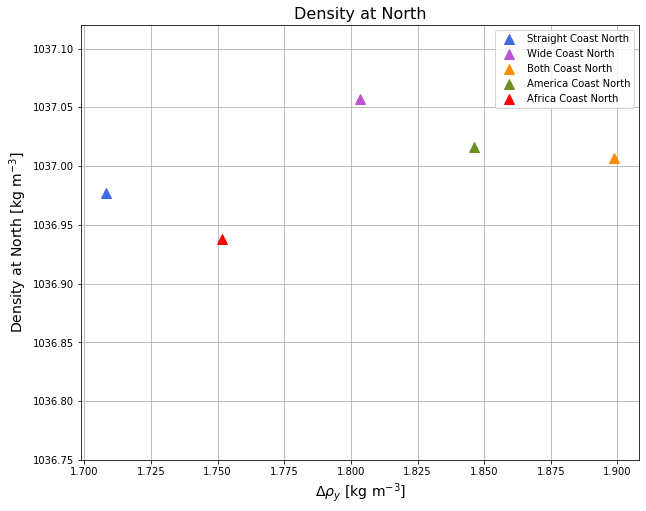

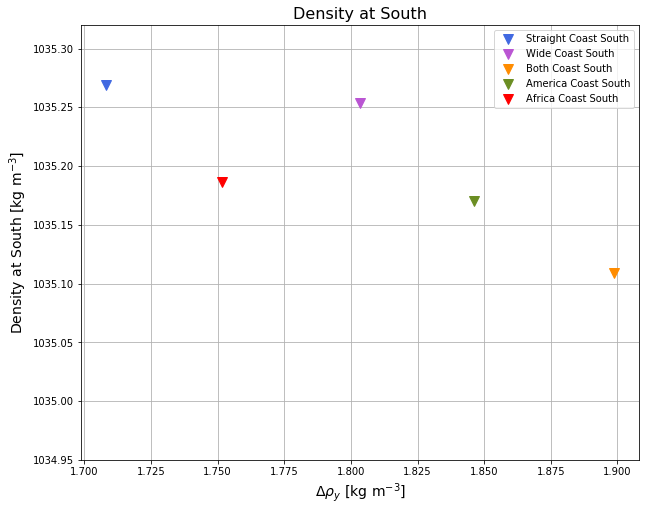

In [40]:
# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(delta_rho_straight, rho_north_straight.mean('xh').mean('yh'), color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_both, rho_north_both.mean('xh').mean('yh'), color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_am, rho_north_am.mean('xh').mean('yh'), color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_af, rho_north_af.mean('xh').mean('yh'), color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_wide, rho_north_wide.mean('xh').mean('yh'), color='mediumorchid', linewidth=2, label=case_wide)
# plt.grid()
# plt.ylabel('Density at North', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(delta_rho_straight, rho_south_straight.mean('xh').mean('yh'), color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_both, rho_south_both.mean('xh').mean('yh'), color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_am, rho_south_am.mean('xh').mean('yh'), color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_af, rho_south_af.mean('xh').mean('yh'), color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_wide, rho_south_wide.mean('xh').mean('yh'), color='mediumorchid', linewidth=2, label=case_wide)
# plt.grid()
# plt.ylabel('Density at South', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(delta_rho_straight.mean(dim='zl'), rho_north_straight.mean('xh').mean('yh').mean(dim='zl'), 
#         '^', color='royalblue', markersize=10, label='{} North'.format(case_straight))
# ax.plot(delta_rho_both.mean(dim='zl'), rho_north_both.mean('xh').mean('yh').mean(dim='zl'), 
#         '^', color='darkorange', markersize=10, label='{} North'.format(case_both))
# ax.plot(delta_rho_am.mean(dim='zl'), rho_north_am.mean('xh').mean('yh').mean(dim='zl'), 
#         '^', color='olivedrab', markersize=10, label='{} North'.format(case_am))
# ax.plot(delta_rho_af.mean(dim='zl'), rho_north_af.mean('xh').mean('yh').mean(dim='zl'), 
#         '^', color='r', markersize=10, label='{} North'.format(case_af))
# ax.plot(delta_rho_wide.mean(dim='zl'), rho_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
#         '^', color='mediumorchid', markersize=10, label='{} North'.format(case_wide))

# ax.plot(delta_rho_straight.mean(dim='zl'), rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
#         'v', color='royalblue', markersize=10, label='{} South'.format(case_straight))
# ax.plot(delta_rho_both.mean(dim='zl'), rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
#         'v', color='darkorange', markersize=10, label='{} South'.format(case_both))
# ax.plot(delta_rho_am.mean(dim='zl'), rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
#         'v', color='olivedrab', markersize=10, label='{} South'.format(case_am))
# ax.plot(delta_rho_af.mean(dim='zl'), rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
#         'v', color='r', markersize=10, label='{} South'.format(case_af))
# ax.plot(delta_rho_wide.mean(dim='zl'), rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
#         'v', color='mediumorchid', markersize=10, label='{} South'.format(case_wide))

# plt.grid()
# plt.ylabel('Density', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.legend()
# plt.show()


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(delta_rho_straight.mean(dim='zl'), rho_north_straight.mean('xh').mean('yh').mean(dim='zl'), 
        '^', color='royalblue', markersize=10, label='{} North'.format(case_straight))
ax.plot(delta_rho_wide.mean(dim='zl'), rho_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
        '^', color='mediumorchid', markersize=10, label='{} North'.format(case_wide))
ax.plot(delta_rho_both.mean(dim='zl'), rho_north_both.mean('xh').mean('yh').mean(dim='zl'), 
        '^', color='darkorange', markersize=10, label='{} North'.format(case_both))
ax.plot(delta_rho_am.mean(dim='zl'), rho_north_am.mean('xh').mean('yh').mean(dim='zl'), 
        '^', color='olivedrab', markersize=10, label='{} North'.format(case_am))
ax.plot(delta_rho_af.mean(dim='zl'), rho_north_af.mean('xh').mean('yh').mean(dim='zl'), 
        '^', color='r', markersize=10, label='{} North'.format(case_af))
plt.grid()
plt.ylim([1036.75, 1037.12])
plt.ylabel('Density at North [kg m$^{-3}$]', fontsize=14), plt.xlabel(r'$\Delta \rho_y$ [kg m$^{-3}$]', fontsize=14)
plt.title('Density at North', fontsize=16)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(delta_rho_straight.mean(dim='zl'), rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
        'v', color='royalblue', markersize=10, label='{} South'.format(case_straight))
ax.plot(delta_rho_wide.mean(dim='zl'), rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
        'v', color='mediumorchid', markersize=10, label='{} South'.format(case_wide))
ax.plot(delta_rho_both.mean(dim='zl'), rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
        'v', color='darkorange', markersize=10, label='{} South'.format(case_both))
ax.plot(delta_rho_am.mean(dim='zl'), rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
        'v', color='olivedrab', markersize=10, label='{} South'.format(case_am))
ax.plot(delta_rho_af.mean(dim='zl'), rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        'v', color='r', markersize=10, label='{} South'.format(case_af))
plt.grid()
plt.ylim([1034.95, 1035.32])
plt.ylabel('Density at South [kg m$^{-3}$]', fontsize=14), plt.xlabel(r'$\Delta \rho_y$ [kg m$^{-3}$]', fontsize=14)
plt.title('Density at South', fontsize=16)
plt.legend()
plt.show()



In [41]:
# # temp held fixed, vary salt between cases

# fig, ax = plt.subplots(figsize=(10,8))
# # ax.plot(delta_rho_straight, rho_north_straight.mean('xh').mean('yh'), color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_salt_both, rho_salt_north_both.mean('xh').mean('yh'), color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_salt_am, rho_salt_north_am.mean('xh').mean('yh'), color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_salt_af, rho_salt_north_af.mean('xh').mean('yh'), color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_salt_wide, rho_salt_north_wide.mean('xh').mean('yh'), color='mediumorchid', linewidth=2, label=case_wide)
# plt.grid()
# plt.ylabel('Density at North', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# # ax.plot(delta_rho_straight, rho_south_straight.mean('xh').mean('yh'), color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_salt_both, rho_salt_south_both.mean('xh').mean('yh'), color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_salt_am, rho_salt_south_am.mean('xh').mean('yh'), color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_salt_af, rho_salt_south_af.mean('xh').mean('yh'), color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_salt_wide, rho_salt_south_wide.mean('xh').mean('yh'), color='mediumorchid', linewidth=2, label=case_wide)
# plt.grid()
# plt.ylabel('Density at South', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()

In [42]:
## salt held fixed, vary temperature between cases

# fig, ax = plt.subplots(figsize=(10,8))
# # ax.plot(delta_rho_straight, rho_north_straight.mean('xh').mean('yh'), color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_temp_both, rho_temp_north_both.mean('xh').mean('yh'), color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_temp_am, rho_temp_north_am.mean('xh').mean('yh'), color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_temp_af, rho_temp_north_af.mean('xh').mean('yh'), color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_temp_wide, rho_temp_north_wide.mean('xh').mean('yh'), color='mediumorchid', linewidth=2, label=case_wide)
# plt.grid()
# plt.ylabel('Density at North', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()

# fig, ax = plt.subplots(figsize=(10,8))
# # ax.plot(delta_rho_straight, rho_south_straight.mean('xh').mean('yh'), color='royalblue', linewidth=2, label=case_straight)
# ax.plot(delta_rho_temp_both, rho_temp_south_both.mean('xh').mean('yh'), color='darkorange', linewidth=2, label=case_both)
# ax.plot(delta_rho_temp_am, rho_temp_south_am.mean('xh').mean('yh'), color='olivedrab', linewidth=2, label=case_am)
# ax.plot(delta_rho_temp_af, rho_temp_south_af.mean('xh').mean('yh'), color='r', linewidth=2, label=case_af)
# ax.plot(delta_rho_temp_wide, rho_temp_south_wide.mean('xh').mean('yh'), color='mediumorchid', linewidth=2, label=case_wide)
# plt.grid()
# plt.ylabel('Density at South', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()

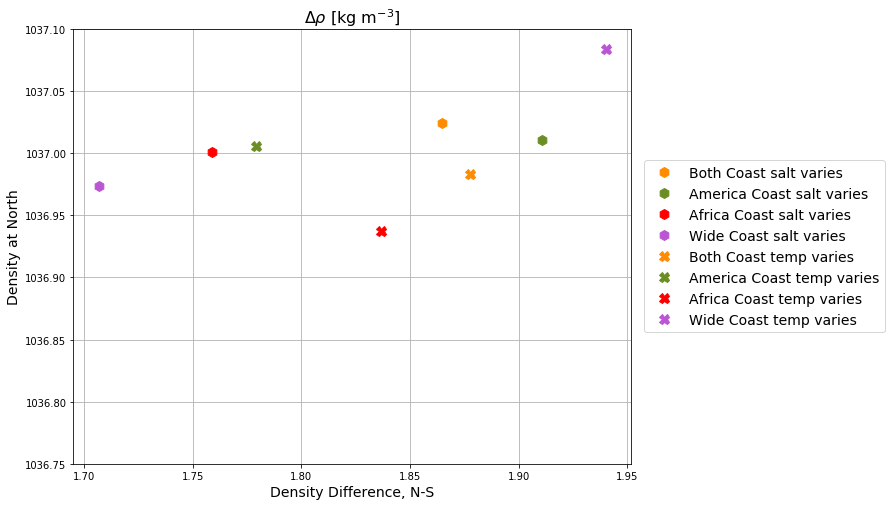

In [43]:
# print('solid line: salinity varies, temperature held fixed')
# print('dash-dot line: temperature varies, salinity held fixed')

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(delta_rho_temp_both, rho_temp_north_both.mean('xh').mean('yh'), 
#         color='darkorange', linewidth=2, linestyle='solid', label=case_both)
# ax.plot(delta_rho_temp_am, rho_temp_north_am.mean('xh').mean('yh'), 
#         color='olivedrab', linewidth=2, linestyle='solid', label=case_am)
# ax.plot(delta_rho_temp_af, rho_temp_north_af.mean('xh').mean('yh'), 
#         color='r', linewidth=2, linestyle='solid', label=case_af)
# ax.plot(delta_rho_temp_wide, rho_temp_north_wide.mean('xh').mean('yh'), 
#         color='mediumorchid', linewidth=2, linestyle='solid', label=case_wide)

# ax.plot(delta_rho_salt_both, rho_salt_north_both.mean('xh').mean('yh'), 
#         color='darkorange', linewidth=2, linestyle='dashdot', label=case_both)
# ax.plot(delta_rho_salt_am, rho_salt_north_am.mean('xh').mean('yh'), 
#         color='olivedrab', linewidth=2, linestyle='dashdot', label=case_am)
# ax.plot(delta_rho_salt_af, rho_salt_north_af.mean('xh').mean('yh'), 
#         color='r', linewidth=2, linestyle='dashdot', label=case_af)
# ax.plot(delta_rho_salt_wide, rho_salt_north_wide.mean('xh').mean('yh'), 
#         color='mediumorchid', linewidth=2, linestyle='dashdot', label=case_wide)
# plt.grid()
# plt.ylabel('Density at North', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()


fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(delta_rho_temp_both.mean(dim='zl'), rho_temp_north_both.mean('xh').mean('yh').mean(dim='zl'), 
#         'h', color='royalblue', markersize=10, label='{} North'.format(case_straight))
ax.plot(delta_rho_temp_both.mean(dim='zl'), rho_temp_north_both.mean('xh').mean('yh').mean(dim='zl'), 
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(delta_rho_temp_am.mean(dim='zl'), rho_temp_north_am.mean('xh').mean('yh').mean(dim='zl'), 
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(delta_rho_temp_af.mean(dim='zl'), rho_temp_north_af.mean('xh').mean('yh').mean(dim='zl'), 
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))
ax.plot(delta_rho_temp_wide.mean(dim='zl'), rho_temp_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))

ax.plot(delta_rho_salt_both.mean(dim='zl'), rho_salt_north_both.mean('xh').mean('yh').mean(dim='zl'), 
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(delta_rho_salt_am.mean(dim='zl'), rho_salt_north_am.mean('xh').mean('yh').mean(dim='zl'), 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(delta_rho_salt_af.mean(dim='zl'), rho_salt_north_af.mean('xh').mean('yh').mean(dim='zl'), 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))
ax.plot(delta_rho_salt_wide.mean(dim='zl'), rho_salt_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))

plt.grid()
plt.ylim([1036.75,1037.1])
plt.ylabel('Density at North', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()


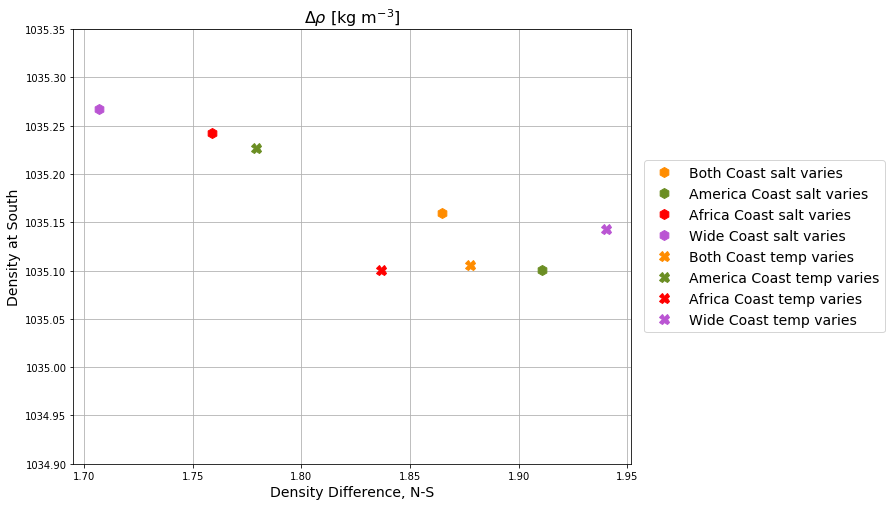

In [44]:
# print('solid line: salinity varies, temperature held fixed')
# print('dash-dot line: temperature varies, salinity held fixed')

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(delta_rho_temp_both, rho_temp_south_both.mean('xh').mean('yh'), 
#         color='darkorange', linewidth=2, linestyle='solid', label=case_both)
# ax.plot(delta_rho_temp_am, rho_temp_south_am.mean('xh').mean('yh'), 
#         color='olivedrab', linewidth=2, linestyle='solid', label=case_am)
# ax.plot(delta_rho_temp_af, rho_temp_south_af.mean('xh').mean('yh'), 
#         color='r', linewidth=2, linestyle='solid', label=case_af)
# ax.plot(delta_rho_temp_wide, rho_temp_south_wide.mean('xh').mean('yh'), 
#         color='mediumorchid', linewidth=2, linestyle='solid', label=case_wide)

# ax.plot(delta_rho_salt_both, rho_salt_south_both.mean('xh').mean('yh'), 
#         color='darkorange', linewidth=2, linestyle='dashdot', label=case_both)
# ax.plot(delta_rho_salt_am, rho_salt_south_am.mean('xh').mean('yh'), 
#         color='olivedrab', linewidth=2, linestyle='dashdot', label=case_am)
# ax.plot(delta_rho_salt_af, rho_salt_south_af.mean('xh').mean('yh'), 
#         color='r', linewidth=2, linestyle='dashdot', label=case_af)
# ax.plot(delta_rho_salt_wide, rho_salt_south_wide.mean('xh').mean('yh'), 
#         color='mediumorchid', linewidth=2, linestyle='dashdot', label=case_wide)
# plt.grid()
# plt.ylabel('Density at South', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
# plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
# plt.show()


fig, ax = plt.subplots(figsize=(10,8))

# ax.plot(delta_rho_temp_both.mean(dim='zl'), rho_temp_south_both.mean('xh').mean('yh').mean(dim='zl'), 
#         'h', color='royalblue', markersize=10, label='{} south'.format(case_straight))
ax.plot(delta_rho_temp_both.mean(dim='zl'), rho_temp_south_both.mean('xh').mean('yh').mean(dim='zl'), 
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(delta_rho_temp_am.mean(dim='zl'), rho_temp_south_am.mean('xh').mean('yh').mean(dim='zl'), 
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(delta_rho_temp_af.mean(dim='zl'), rho_temp_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))
ax.plot(delta_rho_temp_wide.mean(dim='zl'), rho_temp_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))

ax.plot(delta_rho_salt_both.mean(dim='zl'), rho_salt_south_both.mean('xh').mean('yh').mean(dim='zl'), 
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(delta_rho_salt_am.mean(dim='zl'), rho_salt_south_am.mean('xh').mean('yh').mean(dim='zl'), 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(delta_rho_salt_af.mean(dim='zl'), rho_salt_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))
ax.plot(delta_rho_salt_wide.mean(dim='zl'), rho_salt_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))

plt.grid()
plt.ylim([1034.9,1035.35])
plt.ylabel('Density at South', fontsize=14), plt.xlabel('Density Difference, N-S', fontsize=14)
plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

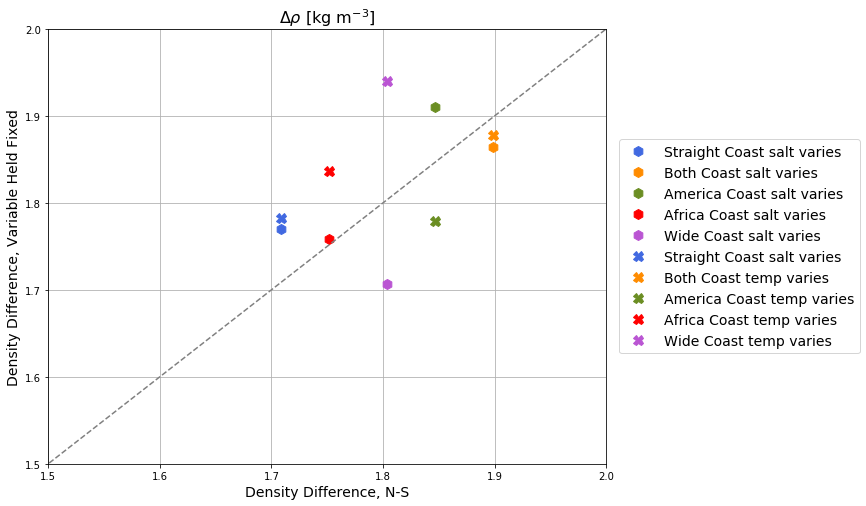

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(delta_rho_straight.mean(dim='zl'), delta_rho_temp_straight.mean(dim='zl'), 
        'h', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
ax.plot(delta_rho_both.mean(dim='zl'), delta_rho_temp_both.mean(dim='zl'),
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(delta_rho_am.mean(dim='zl'),delta_rho_temp_am.mean(dim='zl'),
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(delta_rho_af.mean(dim='zl'),delta_rho_temp_af.mean(dim='zl'),
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))
ax.plot( delta_rho_wide.mean(dim='zl'), delta_rho_temp_wide.mean(dim='zl'),
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))

ax.plot(delta_rho_straight.mean(dim='zl'), delta_rho_salt_straight.mean(dim='zl'), 
        'X', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
ax.plot(delta_rho_both.mean(dim='zl'), delta_rho_salt_both.mean(dim='zl'),
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(delta_rho_am.mean(dim='zl'), delta_rho_salt_am.mean(dim='zl'), 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(delta_rho_af.mean(dim='zl'), delta_rho_salt_af.mean(dim='zl'), 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))
ax.plot(delta_rho_wide.mean(dim='zl'), delta_rho_salt_wide.mean(dim='zl'),
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))

# ax.plot(delta_rho_both.mean(dim='zl'), delta_rho_both.mean(dim='zl'),
#         '.', color='darkorange', markersize=10, label='{}'.format(case_both))
# ax.plot(delta_rho_am.mean(dim='zl'), delta_rho_am.mean(dim='zl'), 
#         '.', color='olivedrab', markersize=10, label='{}'.format(case_am))
# ax.plot(delta_rho_af.mean(dim='zl'), delta_rho_af.mean(dim='zl'), 
#         '.', color='r', markersize=10, label='{}'.format(case_af))
# ax.plot(delta_rho_wide.mean(dim='zl'), delta_rho_wide.mean(dim='zl'),
#         '.', color='mediumorchid', markersize=10, label='{}'.format(case_wide))

plt.plot([1.4,2],[1.4,2], color='gray', linestyle='dashed')
plt.grid()
plt.ylim([1.5,2])
plt.xlim([1.5,2])
plt.ylabel('Density Difference, Variable Held Fixed', fontsize=14)
plt.xlabel('Density Difference, N-S', fontsize=14)
plt.title(r'$\Delta \rho$ [kg m$^{-3}$]', fontsize=16)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

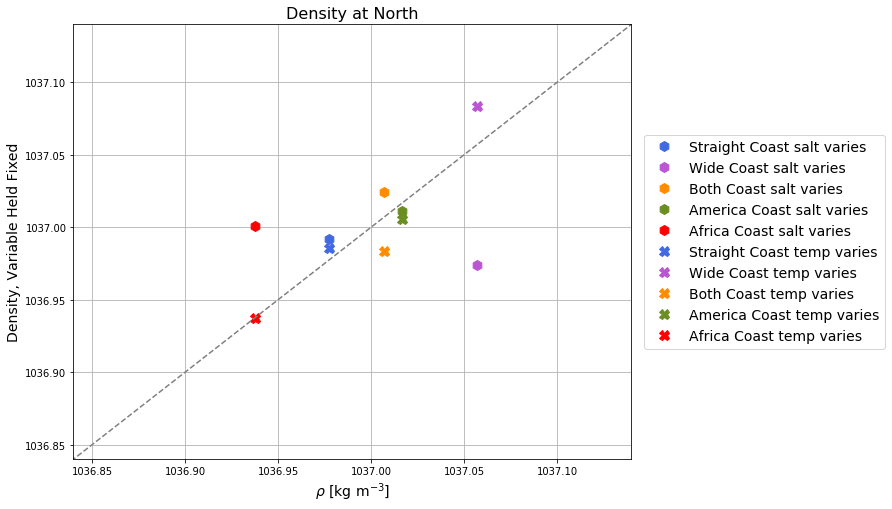

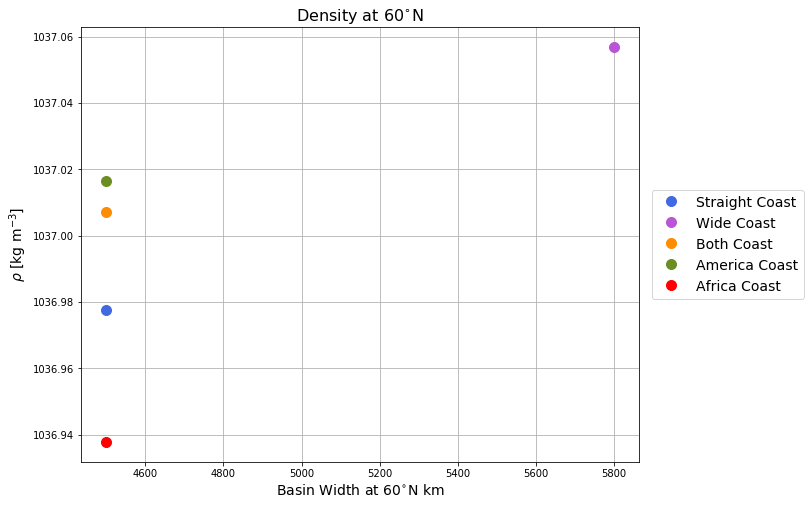

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(rho_north_straight.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_north_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
ax.plot(rho_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_north_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))
ax.plot(rho_north_both.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_north_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(rho_north_am.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_north_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(rho_north_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_north_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))

ax.plot(rho_north_straight.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_north_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='royalblue', markersize=10, label='{} temp varies'.format(case_straight))
ax.plot(rho_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_north_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))
ax.plot(rho_north_both.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_north_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(rho_north_am.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_north_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(rho_north_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_north_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))

ax.plot([1036,1038],[1036,1038], color='gray', linestyle='dashed')

plt.grid()
plt.ylim([1036.84,1037.14])
plt.xlim([1036.84,1037.14])
plt.ylabel('Density, Variable Held Fixed', fontsize=14)
plt.title('Density at North', fontsize=16)
plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()




fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Lx_n_straight/1e3, rho_north_straight.mean('xh').mean('yh').mean(dim='zl'),
        'o', color='royalblue', markersize=10, label='{}'.format(case_straight))
ax.plot(Lx_n_wide/1e3, rho_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='mediumorchid', markersize=10, label='{}'.format(case_wide))
ax.plot(Lx_n_both/1e3, rho_north_both.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='darkorange', markersize=10, label='{}'.format(case_both))
ax.plot(Lx_n_am/1e3, rho_north_am.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='olivedrab', markersize=10, label='{}'.format(case_am))
ax.plot(Lx_n_af/1e3, rho_north_af.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='r', markersize=10, label='{}'.format(case_af))

plt.grid()
# plt.ylim([1036.74,1037.04])
# plt.xlim([1036.74,1037.04])
plt.ylabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
plt.title('Density at 60$^{\circ}$N', fontsize=16)
plt.xlabel('Basin Width at 60$^{\circ}$N km', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()


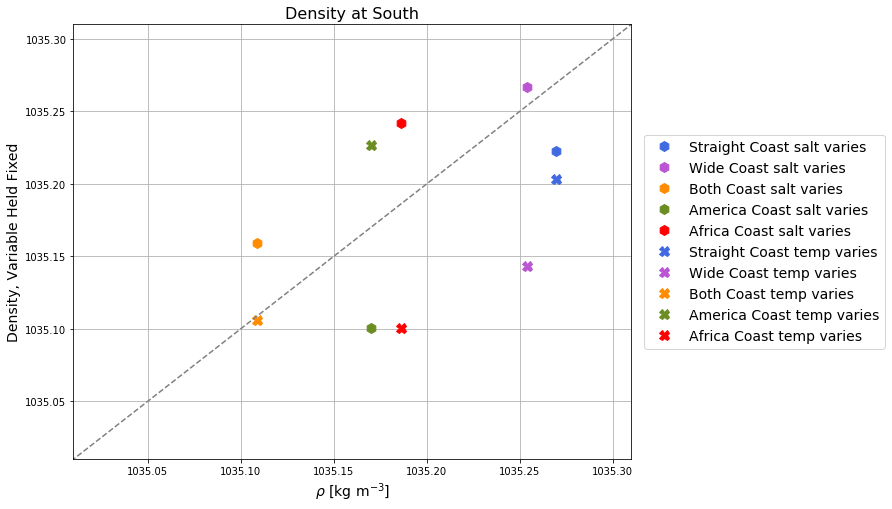

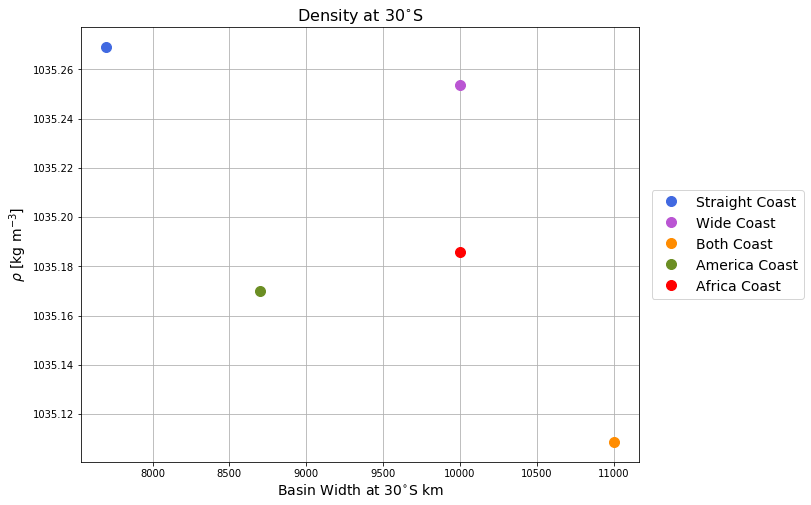

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_south_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='royalblue', markersize=10, label='{} salt varies'.format(case_straight))
ax.plot(rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_south_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='mediumorchid', markersize=10, label='{} salt varies'.format(case_wide))
ax.plot(rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_south_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='darkorange', markersize=10, label='{} salt varies'.format(case_both))
ax.plot(rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_south_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='olivedrab', markersize=10, label='{} salt varies'.format(case_am))
ax.plot(rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_temp_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='r', markersize=10, label='{} salt varies'.format(case_af))

ax.plot(rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='royalblue', markersize=10, label='{} temp varies'.format(case_straight))
ax.plot(rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='mediumorchid', markersize=10, label='{} temp varies'.format(case_wide))
ax.plot(rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='darkorange', markersize=10, label='{} temp varies'.format(case_both))
ax.plot(rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='olivedrab', markersize=10, label='{} temp varies'.format(case_am))
ax.plot(rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='r', markersize=10, label='{} temp varies'.format(case_af))


ax.plot([1034,1036],[1034,1036], color='gray', linestyle='dashed')

plt.grid()
plt.ylim([1035.01,1035.31])
plt.xlim([1035.01,1035.31])
ax.ticklabel_format(useOffset=False)
plt.ylabel('Density, Variable Held Fixed', fontsize=14)
plt.title('Density at South', fontsize=16)
plt.xlabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()


fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Lx_s_straight/1e3, rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='royalblue', markersize=10, label='{}'.format(case_straight))
ax.plot(Lx_s_wide/1e3, rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='mediumorchid', markersize=10, label='{}'.format(case_wide))
ax.plot(Lx_s_both/1e3, rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='darkorange', markersize=10, label='{}'.format(case_both))
ax.plot(Lx_s_am/1e3, rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='olivedrab', markersize=10, label='{}'.format(case_am))
ax.plot(Lx_s_af/1e3, rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        'o', color='r', markersize=10, label='{}'.format(case_af))

plt.grid()
# plt.ylim([1036.74,1037.04])
# plt.xlim([1036.74,1037.04])
ax.ticklabel_format(useOffset=False)
plt.ylabel(r'$\rho$ [kg m$^{-3}$]', fontsize=14)
plt.title('Density at 30$^{\circ}$S', fontsize=16)
plt.xlabel('Basin Width at 30$^{\circ}$S km', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()


In [48]:
north_array_salt_varies = np.array([[rho_north_straight.mean('xh').mean('yh').mean(dim='zl'), 
           rho_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
           rho_north_both.mean('xh').mean('yh').mean(dim='zl'), 
           rho_north_am.mean('xh').mean('yh').mean(dim='zl'), 
           rho_north_af.mean('xh').mean('yh').mean(dim='zl')],
          [rho_temp_north_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
           rho_temp_north_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
           rho_temp_north_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_temp_north_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_temp_north_af.mean(dim='yh').mean(dim='xh').mean(dim='zl')]])
print('Northern density correlation to northern density with temperature held fixed:')
north_salt_varies_corrcoefs = np.corrcoef(north_array_salt_varies)
print(north_salt_varies_corrcoefs[0,1])
print(' ')

north_array_temp_varies = np.array([[rho_north_straight.mean('xh').mean('yh').mean(dim='zl'), 
           rho_north_wide.mean('xh').mean('yh').mean(dim='zl'), 
           rho_north_both.mean('xh').mean('yh').mean(dim='zl'), 
           rho_north_am.mean('xh').mean('yh').mean(dim='zl'), 
           rho_north_af.mean('xh').mean('yh').mean(dim='zl')],
          [rho_salt_north_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_salt_north_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_salt_north_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_salt_north_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
           rho_salt_north_af.mean(dim='yh').mean(dim='xh').mean(dim='zl')]])
print('Northern density correlation to northern density with salinity held fixed:')
north_temp_varies_corrcoefs = np.corrcoef(north_array_temp_varies)
print(north_temp_varies_corrcoefs[0,1])

Northern density correlation to northern density with temperature held fixed:
-0.29676642296171746
 
Northern density correlation to northern density with salinity held fixed:
0.9406112357293546


In [49]:
south_array_salt_varies = np.array([[rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
           rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
           rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
           rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
           rho_south_af.mean('xh').mean('yh').mean(dim='zl')],
          [rho_temp_south_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
           rho_temp_south_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
           rho_temp_south_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_temp_south_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_temp_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl')]])
print('Southern density correlation to southern density with temperature held fixed:')
south_salt_varies_corrcoefs = np.corrcoef(south_array_salt_varies)
print(south_salt_varies_corrcoefs[0,1])
print(' ')

south_array_temp_varies = np.array([[rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
           rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
           rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
           rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
           rho_south_af.mean('xh').mean('yh').mean(dim='zl')],
          [rho_salt_south_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_salt_south_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_salt_south_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'),
           rho_salt_south_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
           rho_salt_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl')]])
print('Southern density correlation to southern density with salinity held fixed:')
south_temp_varies_corrcoefs = np.corrcoef(south_array_temp_varies)
print(south_temp_varies_corrcoefs[0,1])

Southern density correlation to southern density with temperature held fixed:
0.6355168805039986
 
Southern density correlation to southern density with salinity held fixed:
0.39174236080276714


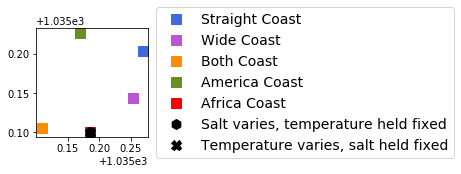

In [50]:
fig, ax = plt.subplots(figsize=(2,2))

ax.plot(rho_south_straight.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_straight.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        's', color='royalblue', markersize=10, label='{}'.format(case_straight))
ax.plot(rho_south_wide.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_wide.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        's', color='mediumorchid', markersize=10, label='{}'.format(case_wide))
ax.plot(rho_south_both.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_both.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        's', color='darkorange', markersize=10, label='{}'.format(case_both))
ax.plot(rho_south_am.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_am.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        's', color='olivedrab', markersize=10, label='{}'.format(case_am))
ax.plot(rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        's', color='r', markersize=10, label='{}'.format(case_af))

ax.plot(rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'h', color='k', markersize=10, label='Salt varies, temperature held fixed')
ax.plot(rho_south_af.mean('xh').mean('yh').mean(dim='zl'), 
        rho_salt_south_af.mean(dim='yh').mean(dim='xh').mean(dim='zl'), 
        'X', color='k', markersize=10, label='Temperature varies, salt held fixed')

plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()
